## Translating Raw Data

The raw CSV exports from the PlayerTek Data include GPS Langitude-Longitude data and velocity data from each player, sampled at a 10Hz Frequency.

#### Example Data

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import datetime
import plotly.express as px
import math
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as animation

drive.mount('/content/drive')
%cd /content/drive/My Drive/Union Soccer Team/Data
!ls

Mounted at /content/drive
/content/drive/My Drive/Union Soccer Team/Data
'Curated CSVs'			   'Player Wellness.gsheet'			  yo2.mp4
 football_game_replay.mp4	    test2.mp4					  yo.mp4
'Moravian Metric Analysis.gsheet'   test.mp4
 PlayerTek			   'Training Intensity RPE ratings 2023.gsheet'


In [ ]:
raw_gps_ex = pd.read_csv('PlayerTek/sample_raw_session_data.csv')
raw_gps_ex=raw_gps_ex.drop([' Heart Rate'],axis=1) # No Heart Rate measured
raw_gps_ex.head()

,Excel Timestamp,Speed,Latitude,Longitude,Accel X,Accel Y,Accel Z
0,45391.515800,1.222232,42.819985,-73.935752,0.190198,0.178530,0.376896
1,45391.515801,1.164454,42.819982,-73.935752,0.213536,0.108518,0.563594
2,45391.515803,1.266677,42.819978,-73.935752,0.073512,0.166861,0.831972
3,45391.515804,1.168898,42.819977,-73.935752,0.691949,-0.078180,0.726954
4,45391.515806,1.342233,42.819975,-73.935752,-0.206534,0.143524,0.575263


In [ ]:
def excel_timestamp_to_datetime(timestamp):
    """
    Convert an Excel date serial number to a datetime object.

    Args:
    timestamp (float): Excel timestamp in serial format.

    Returns:
    datetime.datetime: Corresponding datetime object.
    """
    base_date = datetime.datetime(1899, 12, 30)  # Excel base date for Windows
    days = int(timestamp)
    fraction_of_day = timestamp - days
    time_of_day = datetime.timedelta(days=fraction_of_day)
    result_date = base_date + datetime.timedelta(days=days) + time_of_day
    return result_date


def datetime_to_minute(x,init_time):
  """
  Convert a date time value to a minute:second format
  """
  time_diff = datetime.datetime.combine(datetime.date.min, x) - datetime.datetime.combine(datetime.date.min, init_time)

  total_seconds = time_diff.total_seconds()
  minutes = int(total_seconds // 60)
  seconds = int(total_seconds % 60)
  minute_second = "{:02d}:{:02d}".format(minutes, seconds)

  return minute_second


In [ ]:
raw_gps_ex['DateTime']=raw_gps_ex['Excel Timestamp'].apply(lambda x: excel_timestamp_to_datetime(x))
raw_gps_ex.head()

,Excel Timestamp,Speed,Latitude,Longitude,Accel X,Accel Y,Accel Z,DateTime
0,45391.515800,1.222232,42.819985,-73.935752,0.190198,0.178530,0.376896,2024-04-09 12:22:45.100000
1,45391.515801,1.164454,42.819982,-73.935752,0.213536,0.108518,0.563594,2024-04-09 12:22:45.199999
2,45391.515803,1.266677,42.819978,-73.935752,0.073512,0.166861,0.831972,2024-04-09 12:22:45.399999
3,45391.515804,1.168898,42.819977,-73.935752,0.691949,-0.078180,0.726954,2024-04-09 12:22:45.500000
4,45391.515806,1.342233,42.819975,-73.935752,-0.206534,0.143524,0.575263,2024-04-09 12:22:45.600000


In [ ]:
raw_gps_ex.tail()

,Excel Timestamp,Speed,Latitude,Longitude,Accel X,Accel Y,Accel Z,DateTime
50896,45391.585073,1.102231,42.819875,-73.93588,0.260210,0.178530,0.621937,2024-04-09 14:02:30.300000
50897,45391.585074,1.111120,42.819876,-73.93588,0.271879,0.178530,0.960327,2024-04-09 14:02:30.400000
50898,45391.585075,1.337788,42.819878,-73.93588,0.341890,0.038506,0.563594,2024-04-09 14:02:30.500000
50899,45391.585076,0.000000,42.819878,-73.93588,0.505251,0.015169,0.715286,2024-04-09 14:02:30.600000
50900,45391.585078,0.000000,42.819878,-73.93588,0.563594,-0.054842,0.901984,2024-04-09 14:02:30.699999


In [ ]:
init_time = raw_gps_ex['DateTime'][0].time()
raw_gps_ex['Minute:Second']=raw_gps_ex['DateTime'].apply(lambda x: datetime_to_minute(x.time(),init_time))
raw_gps_ex.head()

,Excel Timestamp,Speed,Latitude,Longitude,Accel X,Accel Y,Accel Z,DateTime,Minute:Second
0,45391.515800,1.222232,42.819985,-73.935752,0.190198,0.178530,0.376896,2024-04-09 12:22:45.100000,00:00
1,45391.515801,1.164454,42.819982,-73.935752,0.213536,0.108518,0.563594,2024-04-09 12:22:45.199999,00:00
2,45391.515803,1.266677,42.819978,-73.935752,0.073512,0.166861,0.831972,2024-04-09 12:22:45.399999,00:00
3,45391.515804,1.168898,42.819977,-73.935752,0.691949,-0.078180,0.726954,2024-04-09 12:22:45.500000,00:00
4,45391.515806,1.342233,42.819975,-73.935752,-0.206534,0.143524,0.575263,2024-04-09 12:22:45.600000,00:00


In [ ]:
raw_gps_ex.columns

Index(['Excel Timestamp', ' Speed', ' Latitude', ' Longitude', ' Accel X',
       ' Accel Y', ' Accel Z', 'DateTime', 'Minute:Second'],
      dtype='object')

In [ ]:
aggregated_df = raw_gps_ex.groupby('Minute:Second').agg({' Speed': 'mean', ' Latitude': 'mean', ' Longitude': 'mean'}).reset_index()
aggregated_df['Minute']=aggregated_df['Minute:Second'].apply(lambda x: int(str(x)[:2]))
aggregated_df.tail()

,Minute:Second,Speed,Latitude,Longitude,Minute
5981,99:41,0.893896,42.819845,-73.935870,99
5982,99:42,0.981341,42.819852,-73.935871,99
5983,99:43,0.933341,42.819862,-73.935875,99
5984,99:44,0.905686,42.819870,-73.935879,99
5985,99:45,0.825192,42.819877,-73.935880,99


#### Coordinates of CPH Soccer Field

- 42.819695, -73.936550
- 42.820165, -73.935390
- 42.819671, -73.935010
- 42.819184, -73.936079


In [ ]:
color_scale = [(0, 'orange'), (1,'red')]

fig = px.scatter_mapbox(aggregated_df,
                        lat=" Latitude",
                        lon=" Longitude",
                        hover_name="Minute:Second",
                        hover_data=["Minute", " Speed"],
                        color="Minute",
                        color_continuous_scale=color_scale,
                        zoom=20,
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:

class Player:
  def __init__(self,player_name,raw_gps,init_time=None):
    self.player_name=player_name
    self.data=raw_gps
    self.data['DateTime'] = self.data['Excel Timestamp'].apply(lambda x: excel_timestamp_to_datetime(x))
    if init_time==None:
      self.init_time = self.data['DateTime'][0].time()
    else:
      self.init_time=init_time
    self.game_date = self.data['DateTime'][0].date()
    self.data['Minute:Second']=self.data['DateTime'].apply(lambda x: datetime_to_minute(x.time(),self.init_time))
    self.data = self.data.groupby('Minute:Second').agg({' Speed': 'mean', ' Latitude': 'mean', ' Longitude': 'mean',' Accel X':'mean', ' Accel Y':'mean',' Accel Z':'mean'}).reset_index()
    self.data=self.data.rename(columns={column: str.strip(column) for column in self.data.columns})

  def show_data(self):
    print (self.data.head())

  # def plot_on_map(self):
  #   color_scale = [(0, 'orange'), (1,'red')]

  #   fig = px.scatter_mapbox(self.data,
  #                           lat="Latitude",
  #                           lon="Longitude",
  #                           hover_name="Minute:Second",
  #                           hover_data=["Minute:Second", "Speed"],
  #                           color="Minute:Second",
  #                           color_continuous_scale=color_scale,
  #                           zoom=20,
  #                           height=800,
  #                           width=800)

  #   fig.update_layout(mapbox_style="open-street-map")
  #   fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
  #   fig.show()

  def excel_timestamp_to_datetime(timestamp):
    """
    Convert an Excel date serial number to a datetime object.

    Args:
    timestamp (float): Excel timestamp in serial format.

    Returns:
    datetime.datetime: Corresponding datetime object.
    """
    base_date = datetime.datetime(1899, 12, 30)  # Excel base date for Windows
    days = int(timestamp)
    fraction_of_day = timestamp - days
    time_of_day = datetime.timedelta(days=fraction_of_day)
    result_date = base_date + datetime.timedelta(days=days) + time_of_day
    return result_date

  def datetime_to_minute(x,init_time):
    """
    Convert a date time value to a minute:second format
    """
    time_diff = datetime.datetime.combine(datetime.date.min, x) - datetime.datetime.combine(datetime.date.min, init_time)

    total_seconds = time_diff.total_seconds()
    minutes = int(total_seconds // 60)
    seconds = int(total_seconds % 60)
    minute_second = "{:02d}:{:02d}".format(minutes, seconds)

    return minute_second

In [ ]:
from tempfile import TemporaryFile
class FootballField:
    """
    Any input given to this class is in (Latitude,Longitude) format and internally, those values are flipped since Longitude is the supposed x value in a coordinate frame, and the Latitude is the supposed y value.
    Methods:
    - calculate_rectangle(): approximates the closest rectangle to the given field corners
    - calculate_tilt(): initialises a rotational matrix whose angle is calculated using the tilt of the field
    - add_player_data(player_data): takes a df with columns [latitude,longitude] and rows with minute:second timestamped data. Merges latitude, longitude cols into one column (longitude,latitude) with the name <player_name>, drops original and joins <player_name> series along time_stamp, and
    """
    def __init__(self, point1, point2, point3, point4):
        self.points = [(x,y) for y,x in [point1, point2, point3, point4]] #flipping latitude-longitude to x,y
        self.coordinate_frame = pd.DataFrame({'Minute:Second':["{:02d}:{:02d}".format(minutes, seconds) for minutes in range(0,60) for seconds in range(0,150)]})
        self.players={}
        self.calculate_rectangle() #calculates a still tilted, but now geometric rectangle
        self.calculate_rotational_angle() #calculates tilt of field from bottom edge (edge between point3 and point4)
        self.calculate_rotational_matrix() #calculates the matrix which any point can be multiplied by to yield a rotated point
        self.translation_factor = self.points[3] #sets the bottom left corner as the expected origin for the coordinate system
        self.translated_points = [self.translate_point(point) for point in self.points] #
        self.rotated_points = [self.rotate_point(point) for point in self.translated_points]

    def calculate_rectangle(self):
        """
        Adjusts self.points to calculate a rectangle to rely on as coordinate axes and relabel self.points (Assumes measured reliability of one of the lines of the field)
        """
        # centre = (sum([x for x, _ in self.points]) / 4, sum([y for _, y in self.points]) / 4)
        self.field_len = math.dist(self.points[2],self.points[3])#sum((math.dist(self.points[0], self.points[1]), math.dist(self.points[2], self.points[3]))) / 2
        self.field_wid = math.dist(self.points[1],self.points[2])#sum((math.dist(self.points[0], self.points[3]), math.dist(self.points[2], self.points[1]))) / 2
        m_bottom_edge = (self.points[2][1]-self.points[3][1])/(self.points[2][0]-self.points[3][0])
        self.m = m_bottom_edge
        m_side_edge = -1/m_bottom_edge
        translation_vec_wid_down = (self.field_wid/math.sqrt(1+m_side_edge**2),self.field_wid*m_side_edge/math.sqrt(1+m_side_edge**2))
        bottom_left=self.points[3]
        top_left = (bottom_left[0]-translation_vec_wid_down[0],bottom_left[1]-translation_vec_wid_down[1])
        translation_vec_len = (self.field_len/math.sqrt(1+m_bottom_edge**2),self.field_len*m_bottom_edge/math.sqrt(1+m_bottom_edge**2))
        top_right = (top_left[0]+translation_vec_len[0],top_left[1]+translation_vec_len[1])
        bottom_right = (bottom_left[0]+translation_vec_len[0],bottom_left[1]+translation_vec_len[1])
        self.points = [top_left,top_right,bottom_right,bottom_left]

    # def draw_player_90_map(self,player_name):
    #     self.players[player_name].plot_on_map()


    def translate_point(self,point):
        return (point[0]-self.translation_factor[0],point[1]-self.translation_factor[1])

    def rotate_point(self,point):
        """
        Given a point (x, y), rotates it using self.rotational_matrix
        """
        point_array = np.array(point)
        rotated_point = np.dot(self.rotational_matrix, point_array)

        return rotated_point

    def calculate_rotational_matrix(self):
        """
        Calculates a matrix, which when a 2d point is multipled by, will rotate the point's frame of reference
        """

        # Calculate sine and cosine of the angle
        cos_angle = np.cos(self.angle)
        sin_angle = np.sin(self.angle)

        # Construct the rotational matrix
        self.rotational_matrix = np.array([[cos_angle, -sin_angle], [sin_angle, cos_angle]])



    def calculate_rotational_angle(self):
        """
        Calculates the angle that the bottom edge of the field is tilted
        Instantiate self.angle as this angle
        """
        self.angle = -math.atan(self.m)

    def draw_field(self):
        plt.plot([x for x,_ in self.points], [y for _,y in self.points], marker='o', linestyle='-')

    def draw_field_rotated(self):
        fig, ax = plt.subplots()
        rect = patches.Rectangle((self.rotated_points[3][0], self.rotated_points[3][1]), self.field_len,self.field_wid,  facecolor='green', edgecolor='black',alpha=0.5)
        halfway_point = (self.rotated_points[2][0]+self.rotated_points[3][0])/2
        ax.plot([halfway_point,halfway_point], [self.rotated_points[0][1], self.rotated_points[2][1]], color='white')
        ax.add_patch(rect)

    def draw_player_90_raw(self,player,show=True):
        self.test_var1=[(player.data[['Latitude','Longitude']].loc[i][1], player.data[['Latitude','Longitude']].loc[i][0]) for i in range(0,len(player.data['Latitude']))]
        player_90_raw = [self.rotate_point(self.translate_point((player.data[['Latitude','Longitude']].loc[i][1], player.data[['Latitude','Longitude']].loc[i][0]))) for i in range(0,len(player.data['Latitude']))]
        self.draw_field_rotated()
        coordinates=player_90_raw
        plt.plot([(x) for x,_ in coordinates], [y for _,y in coordinates], marker='.', linestyle='-')
        plt.title('Player 90')
        plt.grid(True)
        plt.figure(figsize=(12, 9))
        if show:
            plt.show()

    def combine_lat_long(self,lat,long):
        return ((long,lat)) #flip because x,y is longitude latitude

    def draw_player_90(self,player_name,show=True):
        xy = self.coordinate_frame[player_name].dropna().values
        self.draw_field_rotated()
        plt.plot([x for x,_ in xy],[y for _,y in xy], marker='.', markersize=10, linestyle='-', linewidth=1, color='white', markerfacecolor='black', markeredgecolor='white', alpha=0.5)
        plt.title('Player 90')
        plt.grid(True)
        plt.figure(figsize=(12, 9))
        if show:
            plt.show()

    def add_player_data(self,player):
        self.players.update({player.player_name:player})
        player_coords = player.data[['Minute:Second','Latitude','Longitude']]
        player_coords[player.player_name]=player_coords.apply(lambda x: self.combine_lat_long(x.Latitude,x.Longitude),axis=1)
        self.test_var2=player_coords[player.player_name].values
        player_coords[player.player_name]=player_coords[player.player_name].apply(lambda x: self.translate_point(x))
        player_coords[player.player_name]=player_coords[player.player_name].apply(lambda x: self.rotate_point(x))
        self.coordinate_frame = self.coordinate_frame.merge(right=player_coords[['Minute:Second',player.player_name]],on='Minute:Second',how='outer')
        self.coordinate_frame.head()

    def draw_field_at_time(self,time_stamp,show=True):
        self.draw_field_rotated()
        for player_name in self.players:
            try:
                self.draw_player_at_time(time_stamp,player_name)
            except Exception as e:
                pass
        plt.title(f'Field at {time_stamp}')
        plt.grid(True)
        if show:
            plt.show()

    def draw_player_at_time(self,time_stamp,player_name):
        xy = self.coordinate_frame.loc[self.coordinate_frame['Minute:Second'] == time_stamp][player_name].values
        plt.plot([x for x,_ in xy],[y for _,y in xy], marker='.', markersize=10, linestyle='-', linewidth=1, label=player_name)


    def animate_field(self, path,speed_up=1):
        """
        Generates a video replay of the game.

        Parameters:
        - speed_up: int, the speed multiplier for the video replay.
        """
        # Initialize figure and axis
        fig, ax = plt.subplots()
        %matplotlib inline
        %matplotlib inline

        # Function to update each frame
        def update(frame):
            ax.clear()
            minutes = int(frame // 60)
            seconds = int(frame % 60)
            minute_second = "{:02d}:{:02d}".format(minutes, seconds)
            print(minute_second)
            self.draw_field_at_time(minute_second,show=True)

        # Calculate frames and interval
        frames = 100 #len(self.coordinate_frame)
        interval = 1000 // (30 * speed_up)  # Adjust interval for speed up

        # Create animation
        anim = animation.FuncAnimation(fig, update, frames=frames, interval=interval, repeat=False)
        from IPython.display import HTML
        HTML(anim.to_html5_video())
        # plt.show()
        # Set up formatting for the movie files
        # writer = animation.writers['ffmpeg'](fps=30*speed_up)

        # # Save animation
        # anim.save(path, writer=writer)

# Example usage:
point1=(42.819707, -73.936629)
point2=(42.820238, -73.935354)
point3=(42.819647, -73.934901)
point4=(42.819106, -73.936110)

field = FootballField(point1, point2, point3, point4)


In [ ]:
player_1= Player('Ansh',pd.read_csv('PlayerTek/sample_raw_session_data.csv'))
player_1.show_data()

  Minute:Second     Speed   Latitude  Longitude   Accel X   Accel Y   Accel Z
0         00:00  1.373344  42.819975 -73.935752  0.401530  0.205757  0.732141
1         00:01  2.883833  42.819942 -73.935750  0.700283  0.190198  0.733622
2         00:02  3.300767  42.819907 -73.935742  0.800856  0.039803  0.452094
3         00:03  1.068897  42.820046 -73.935658  0.618047  0.046285  0.419681
4         00:04  1.335566  42.820066 -73.935653  0.875729  0.146441  0.584014


In [ ]:
field.add_player_data(player_1)
player_1.game_date

<ipython-input-11-da1571e07acd>:114: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-11-da1571e07acd>:116: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-11-da1571e07acd>:117: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



datetime.date(2024, 4, 9)

In [ ]:
#field.draw_player_90_raw(player_1)

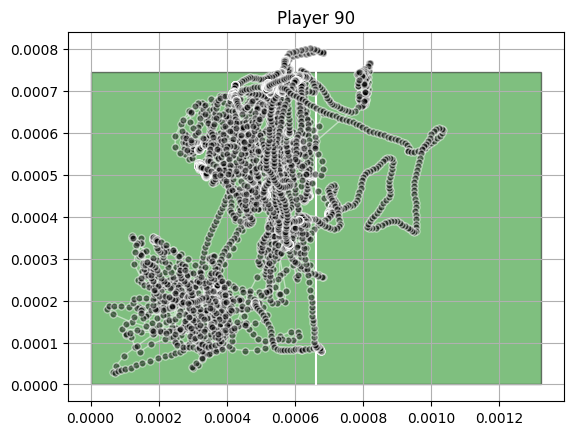

<Figure size 1200x900 with 0 Axes>

In [ ]:
field.draw_player_90('Ansh')

### Scraping URLs

- https://apius.playertek.com//webinterface/RawDataService.php?token=token&sessionID=session_id downloads the raw data csv required

In [ ]:
ben= Player('Borgardous',pd.read_csv('PlayerTek/SLU Game/b_borgardous.csv'))
wyatt=Player('Goldfisher',pd.read_csv('PlayerTek/SLU Game/w_goldfisher.csv'))

In [ ]:
slu_field = FootballField((44.584161, -75.163275),(44.585157, -75.163222),(44.585152, -75.162214),(44.584137, -75.162274))

In [ ]:
slu_field.add_player_data(ben)
slu_field.add_player_data(wyatt)

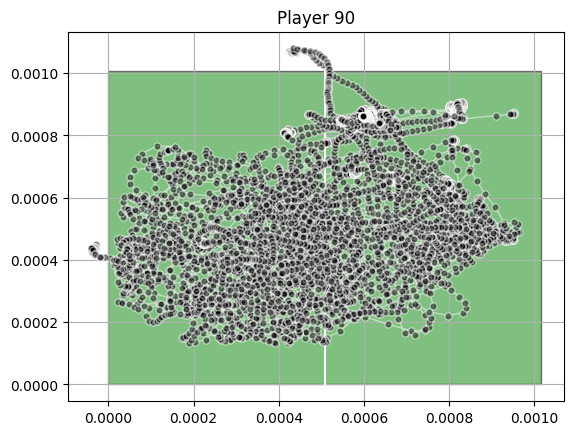

<Figure size 1200x900 with 0 Axes>

In [ ]:
slu_field.draw_player_90('Goldfisher')

In [ ]:
import requests
from io import StringIO

url = "https://apius.playertek.com//webinterface/RawDataService.php?token=76112:086d14180a56ebca246a67fd1003547d9353f851e1e7d9a7d2f15ce25dab0162&sessionID=3561684"

response = requests.get(url)

if response.status_code == 200:
    csv_data = response.text
    # Now csv_data contains the CSV content from the URL
else:
    print("Failed to fetch data:", response.status_code)

csv_file = StringIO(csv_data)

test_player = Player('test_player',pd.read_csv(csv_file),datetime.time(16))


<ipython-input-11-da1571e07acd>:114: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-11-da1571e07acd>:116: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-11-da1571e07acd>:117: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



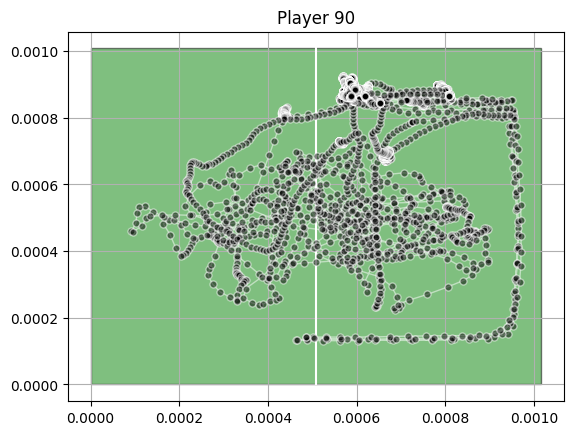

<Figure size 1200x900 with 0 Axes>

In [ ]:
slu_field.add_player_data(test_player)
slu_field.draw_player_90('test_player')

In [ ]:
import warnings

# Suppress SettingWithCopyWarning
pd.options.mode.chained_assignment = None

def game_scraper(token,id_range,game_date,field,init_time):
  url = "https://apius.playertek.com//webinterface/RawDataService.php?token="+token+"&sessionID="
  for session_id in id_range:
    sp_url = url+str(session_id)
    response = requests.get(sp_url)
    if response.status_code == 200:
        csv_data = response.text
        # Now csv_data contains the CSV content from the URL
        csv_file = StringIO(csv_data)
        try:
          player_csv = pd.read_csv(csv_file)
          player_to_add = Player('player_'+str(session_id),player_csv,init_time)
          print(player_to_add.data['Minute:Second'].min())
          # if player_to_add.game_date==game_date:
          field.add_player_data(player_to_add)
        except Exception as e:
          # print ('error',e)
          pass
    else:
        print("Failed to fetch data:", response.status_code)

In [ ]:
slu_field = FootballField((44.584161, -75.163275),(44.585157, -75.163222),(44.585152, -75.162214),(44.584137, -75.162274))
token = ""
id_range=range(3561600,3561900)
game_date = datetime.datetime(2023, 10, 18)
init_time = datetime.time(16)
game_scraper(token,id_range,game_date,slu_field,init_time)

-1:00
-1:00
-1:00
-1:00
-1:00
-1:00
-1:00
-1:00
-1:00
-1:00
100:00
-1:00
-1:00
100:00
-1:00
-1:00
-1:00
100:00


In [ ]:
slu_field.players

{'player_3561640': <__main__.Player at 0x7827ee14b490>,
 'player_3561641': <__main__.Player at 0x7827edf33a30>,
 'player_3561647': <__main__.Player at 0x7827e5cc7040>,
 'player_3561649': <__main__.Player at 0x7827ec485300>,
 'player_3561651': <__main__.Player at 0x7827e5c22ce0>,
 'player_3561656': <__main__.Player at 0x7827e581ac50>,
 'player_3561658': <__main__.Player at 0x7827e5c8ec50>,
 'player_3561669': <__main__.Player at 0x7827e095ec50>,
 'player_3561670': <__main__.Player at 0x7827ec482ce0>,
 'player_3561674': <__main__.Player at 0x7827ec452e90>,
 'player_3561675': <__main__.Player at 0x7827e58770d0>,
 'player_3561684': <__main__.Player at 0x7827e5cb2ce0>,
 'player_3561698': <__main__.Player at 0x7827e578ac50>,
 'player_3561701': <__main__.Player at 0x7827e57f6f50>,
 'player_3561708': <__main__.Player at 0x7827dd6a2f50>,
 'player_3561713': <__main__.Player at 0x7827e082acb0>,
 'player_3561716': <__main__.Player at 0x7827e08d6c50>,
 'player_3561718': <__main__.Player at 0x7827e57

In [ ]:
slu_field.coordinate_frame

,Minute:Second,player_3561640,player_3561641,player_3561647,player_3561649,player_3561651,player_3561656,player_3561658,player_3561669,player_3561670,player_3561674,player_3561675,player_3561684,player_3561698,player_3561701,player_3561708,player_3561713,player_3561716,player_3561718
0,00:00,"[0.0006513069874439734, 0.0007818772193556021]","[0.0005759640851852493, 0.0004552894773763116]","[0.0005320247316999131, 0.0004756326681403696]","[0.0004833459880239397, 0.00047013645663104413]","[0.0005575448469528258, 0.000437783206464317]","[0.0005607913107134238, 0.0008952050330778425]","[0.0004702823497389815, 0.000439096662948011]","[0.0004515875284783652, 0.000484621131509589]","[0.0004409436595190085, 0.0004431603781869988]","[0.0006321028824261801, 0.0008677700215512324]",NaN,"[0.0005981402553423958, 0.0008688068241527402]","[0.000659729602732036, 0.000828825586297766]",NaN,"[0.0004092546266983955, 0.0004267561353798903]","[0.00039170062378440784, 0.0005218394285357563]","[0.0006171835381008959, 0.0008190183316854761]",NaN
1,00:01,"[0.0006524874840304241, 0.0007819470024050364]","[0.0006122005280193545, 0.0004515657450520031]","[0.0005621775745899296, 0.0004743006935660995]","[0.0005345737807648245, 0.0004675090872960405]","[0.0005973144318353884, 0.0004352504194454144]","[0.0005607507915231321, 0.0008958904827137186]","[0.0004975011155504686, 0.0004394331410461383]","[0.00047962946092166756, 0.0004848293953317998]","[0.0004673910064130881, 0.0004460557851635528]","[0.0006316459160069914, 0.0008677430087579841]",NaN,"[0.0005981402553415573, 0.0008688068241669262]","[0.0006580362382512583, 0.0008283815635120303]",NaN,"[0.00043215691697565215, 0.0004343693534906216]","[0.00041171156971485753, 0.0005359576461826328]","[0.0006171835381008959, 0.0008190183316854761]",NaN
2,00:02,"[0.0006528302088483622, 0.0007819672620001822]","[0.0006468689157254179, 0.0004478639606401691]","[0.000588195115250121, 0.0004734312192800184]","[0.0005806475700664988, 0.00046350706694065543]","[0.000624098460503269, 0.00043305056510582556]","[0.0005606967659366356, 0.0008968044155520961]","[0.0005203940826610561, 0.0004374427296432892]","[0.0005046926433426024, 0.0004842665350094867]","[0.0004931977508099038, 0.00044708998925742057]","[0.0006316459160069914, 0.0008677430087579841]",NaN,"[0.0005981402553423958, 0.0008688068241527402]","[0.0006576973724096283, 0.0008249714395359672]",NaN,"[0.00045607440054495283, 0.00043734995261238894]","[0.00044587102889605024, 0.00053375432144116]","[0.0006171835381008959, 0.0008190183316854761]",NaN
3,00:03,"[0.0006540127689076959, 0.0007826485846886153]","[0.0006801196382708448, 0.0004446783269294078]","[0.0006145212770766972, 0.0004719953204987943]","[0.0006234102474698164, 0.0004581781931960001]","[0.0006541716344101848, 0.0004345531517193493]","[0.0005596034981661189, 0.0008971983521061861]","[0.0005480393504681105, 0.00043392573898799774]","[0.00053105810503312, 0.0004817133008003765]","[0.0005193805572428587, 0.0004479498965168745]","[0.0006316459160069914, 0.0008677430087579841]",NaN,"[0.0005975309667834776, 0.0008687708070950758]","[0.0006533295966854977, 0.0008184047259705688]",NaN,"[0.0004827315253600659, 0.0004363272182458039]","[0.0004999176253659188, 0.0005244915595925742]","[0.0006171835381008959, 0.0008190183316854761]",NaN
4,00:04,"[0.0006536059825019844, 0.0007833888102591702]","[0.0007069009897722021, 0.0004407783549093696]","[0.0006333757002826726, 0.0004712870788091324]","[0.0006589767382040768, 0.0004512797046353949]","[0.0006792476103973817, 0.0004339031563899493]","[0.0005592684644941506, 0.0008976944308007145]","[0.0005748091974201018, 0.0004319657920089073]","[0.0005550995875073697, 0.00047894844493334894]","[0.0005486389765347191, 0.0004488196521708957]","[0.0006316459160069914, 0.0008677430087579841]",NaN,"[0.0005967693560848296, 0.0008687257857729954]","[0.0006516688163945839, 0.0008168276853287121]",NaN,"[0.0005088977301791405, 0.00043649829927012085]","[0.0005576996784505269, 0.000518621341

In [ ]:
slu_field.coordinate_frame['Minute:Second'].max()

'99:59'

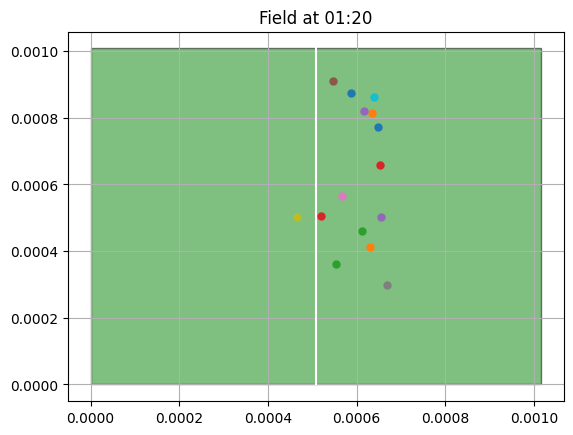

In [ ]:
slu_field.draw_field_at_time("01:50")

00:00


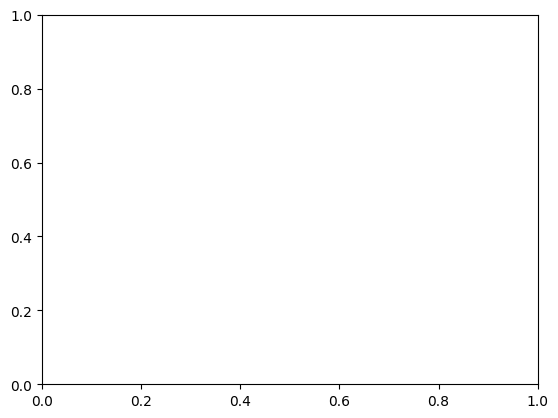

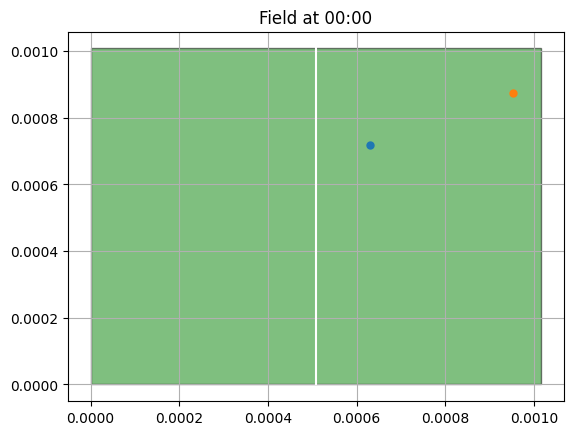

00:00


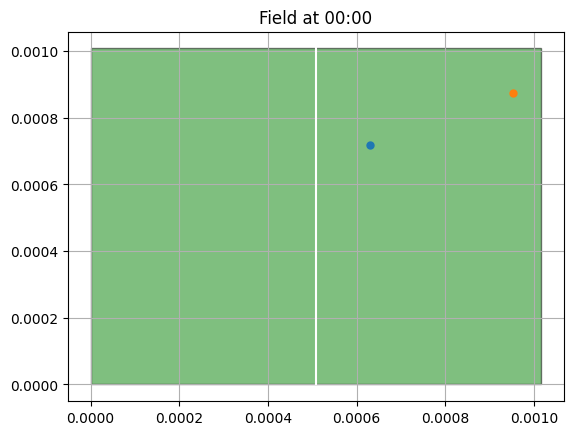

00:01


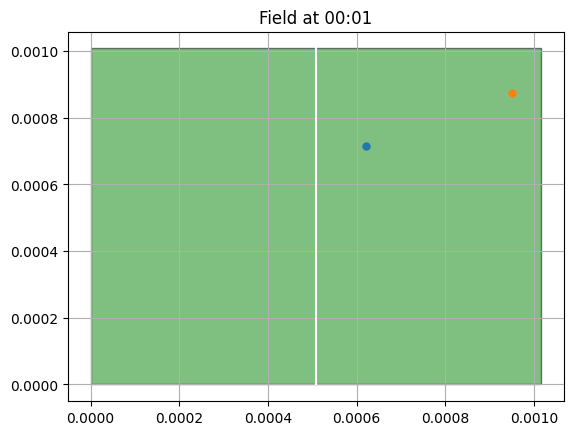

00:02


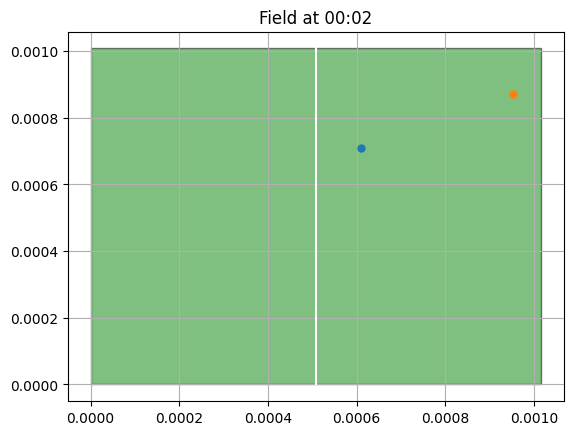

00:03


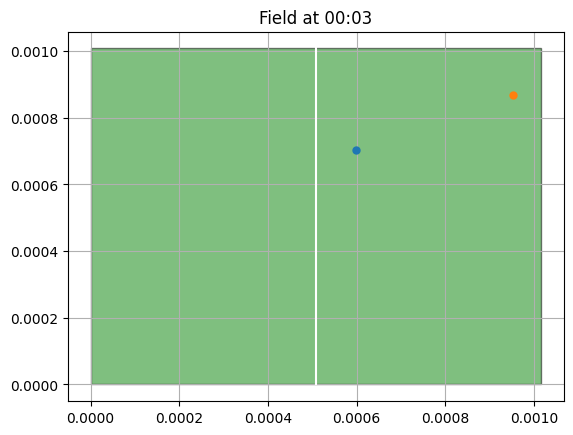

00:04


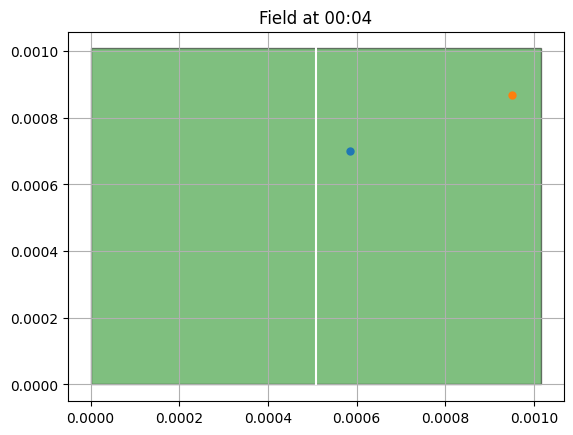

00:05


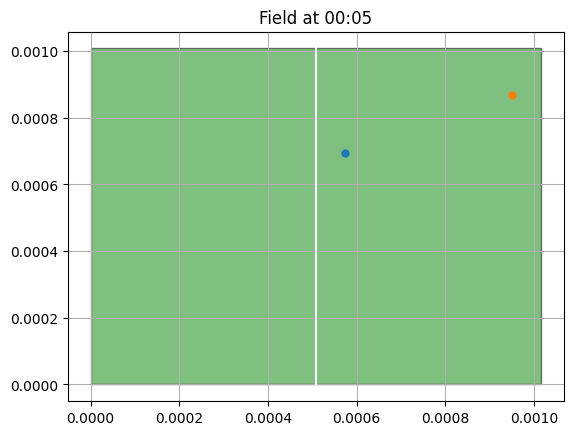

00:06


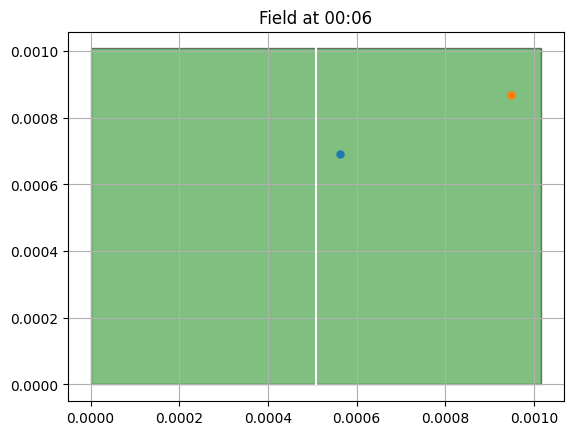

00:07


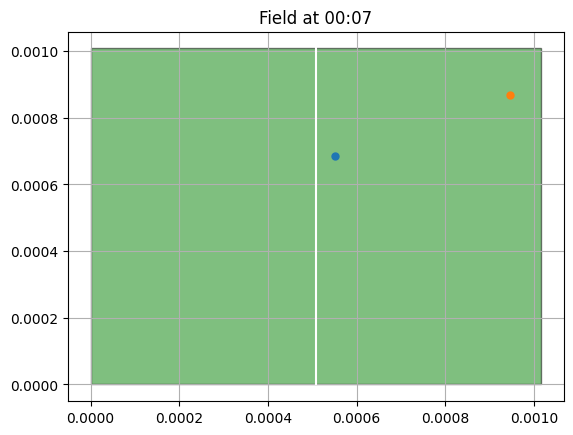

00:08


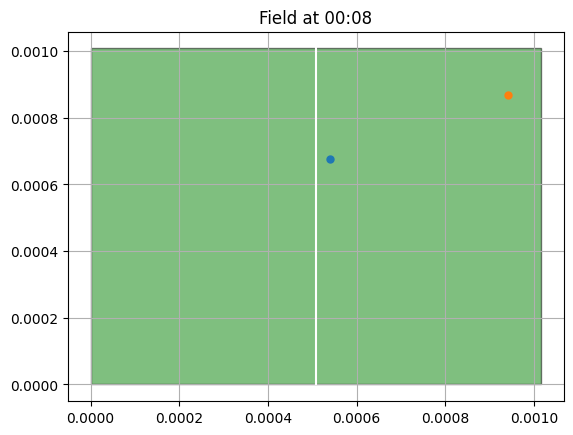

00:09


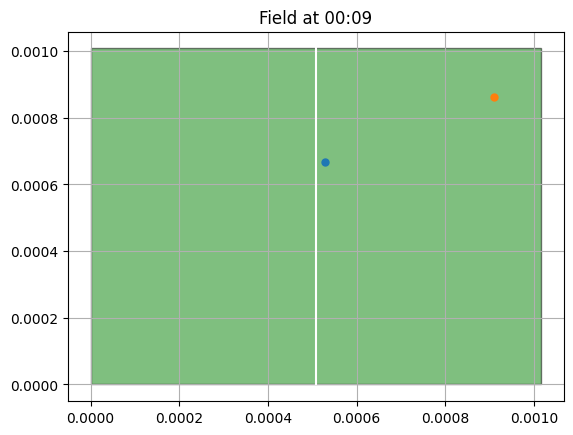

00:10


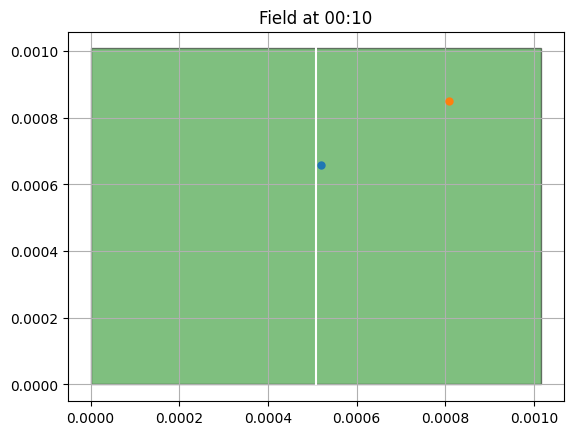

00:11


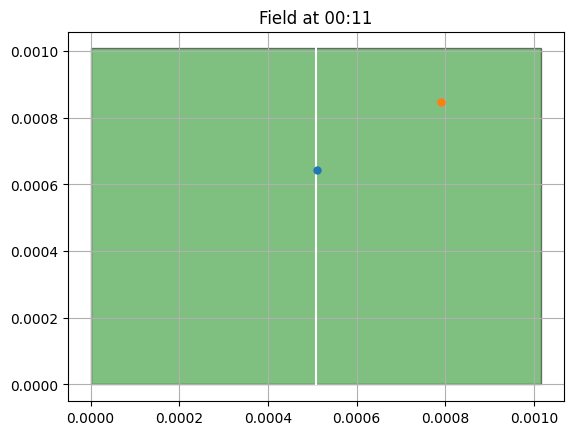

00:12


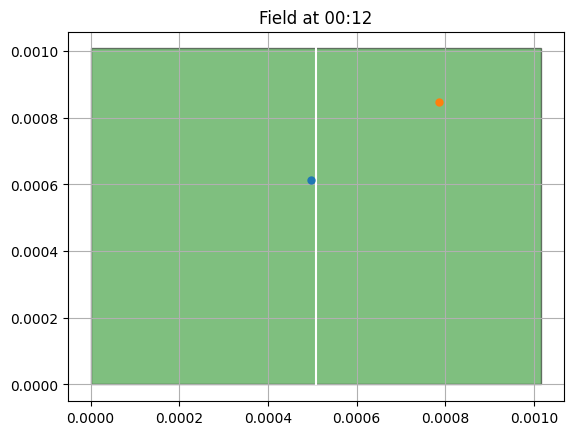

00:13


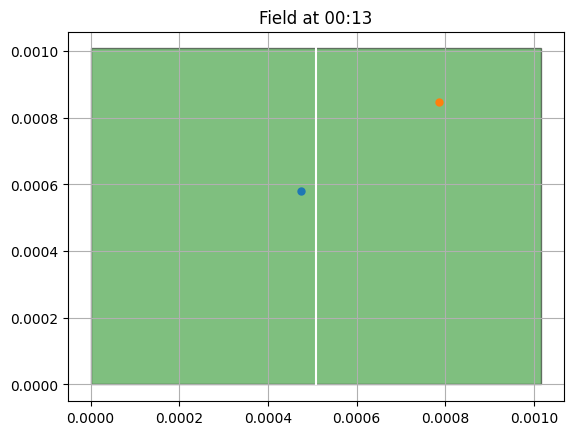

00:14


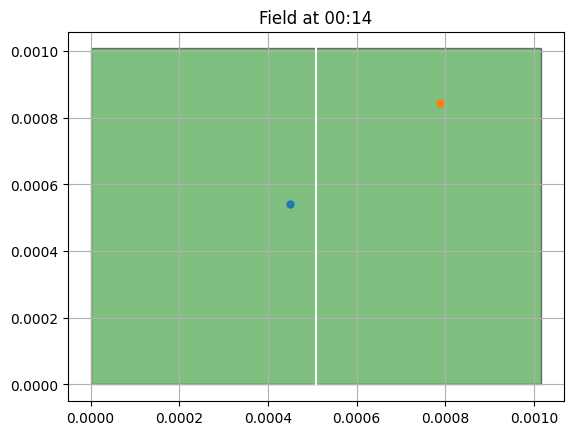

00:15


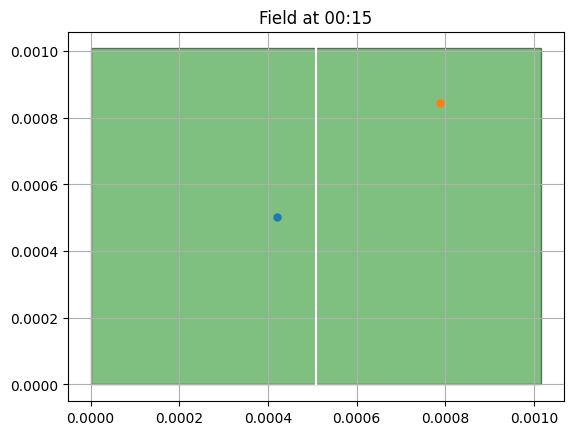

00:16


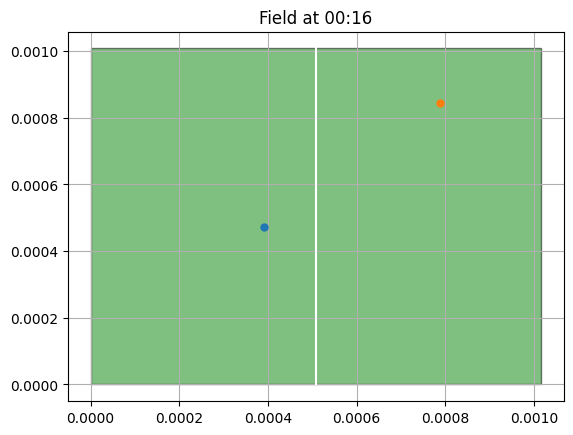

00:17


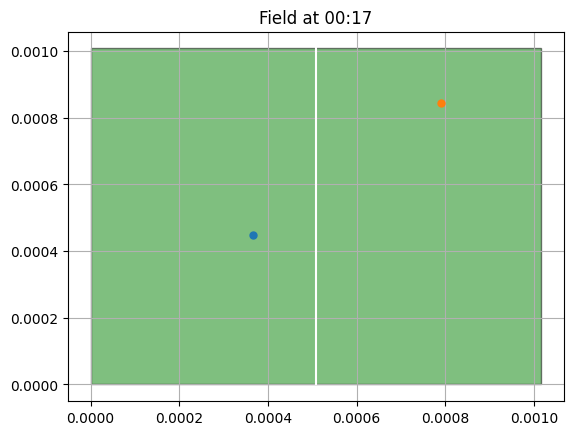

00:18


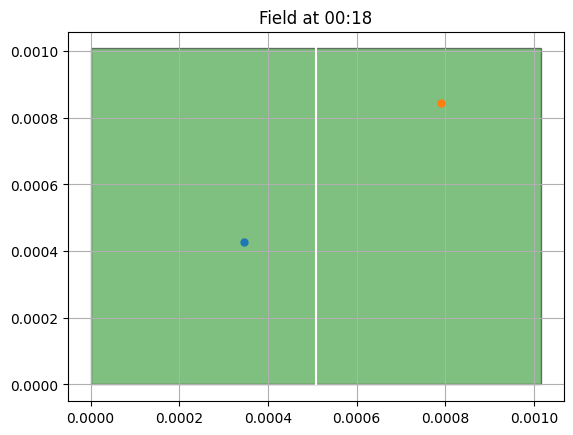

00:19


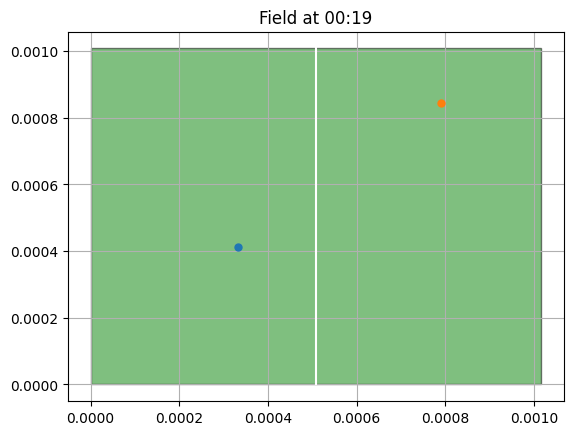

00:20


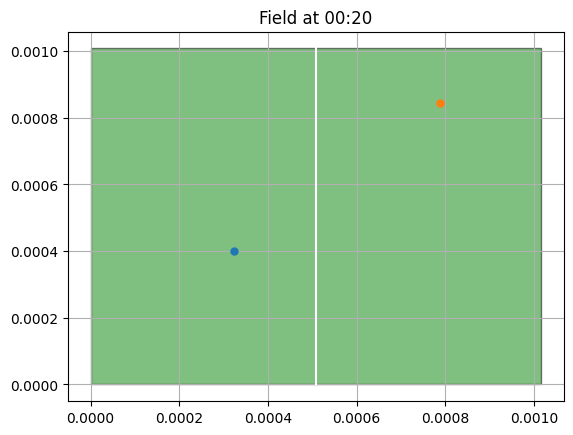

00:21


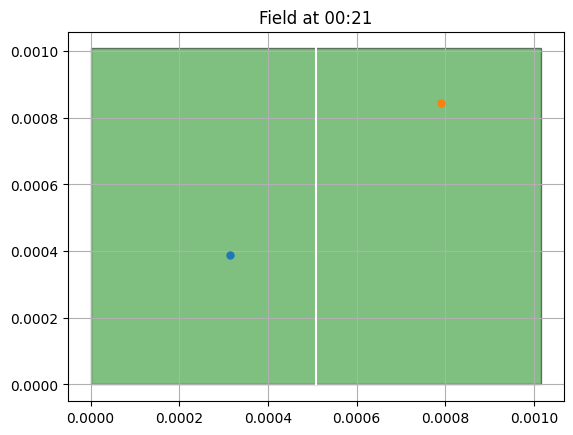

00:22


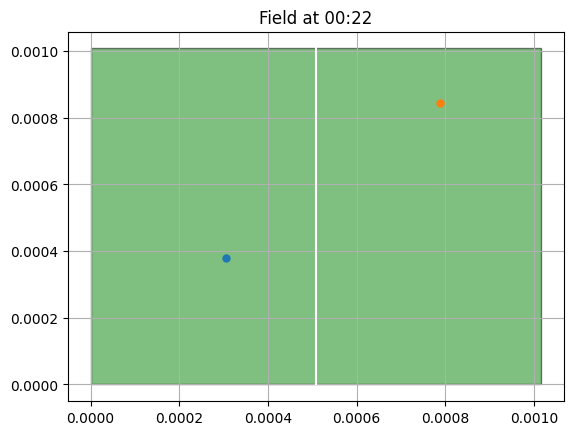

00:23


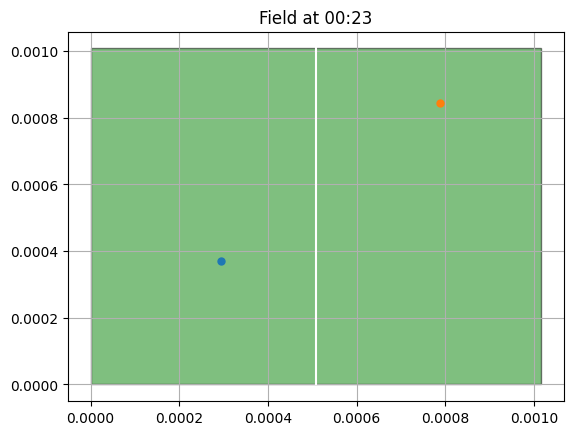

00:24


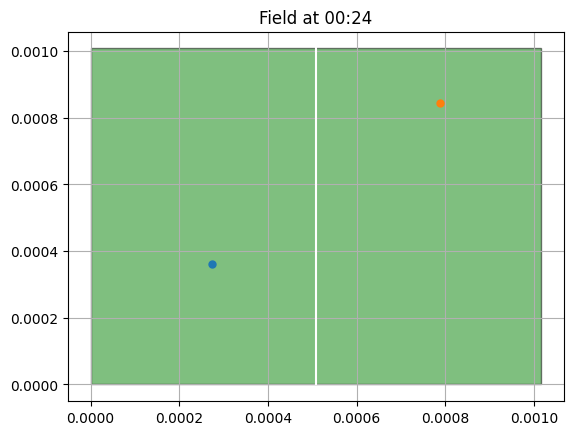

00:25


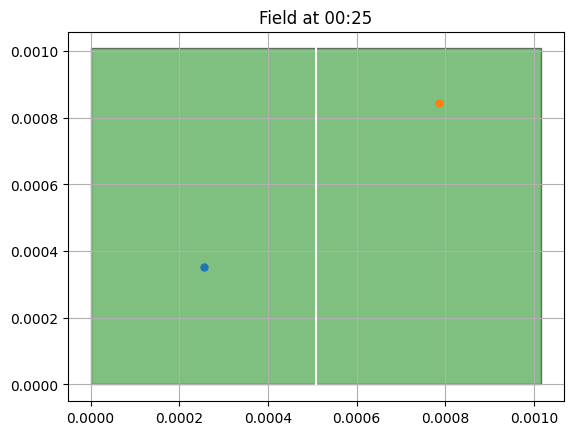

00:26


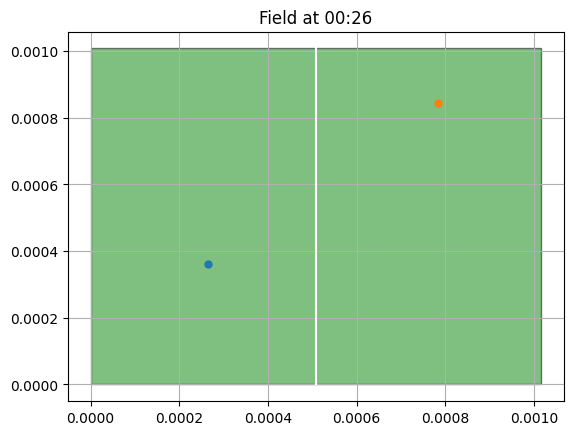

00:27


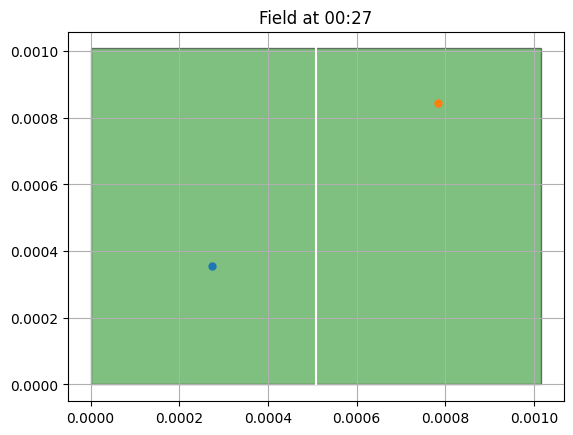

00:28


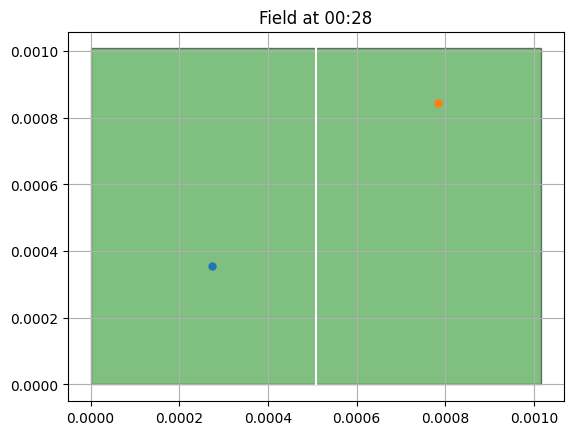

00:29


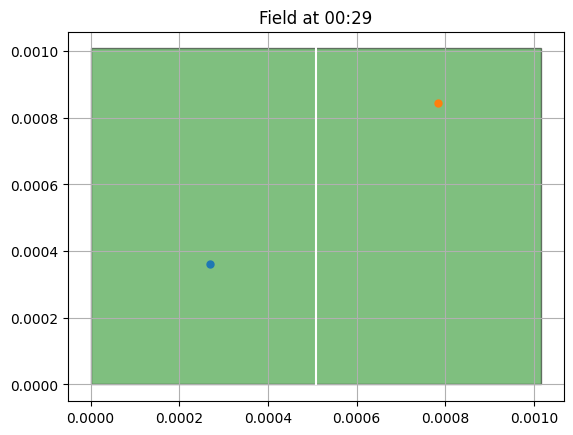

00:30


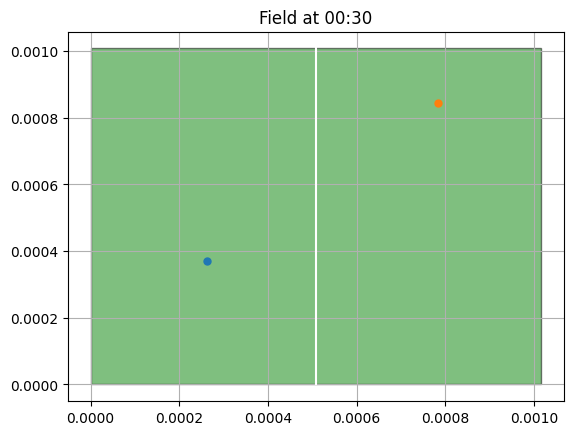

00:31


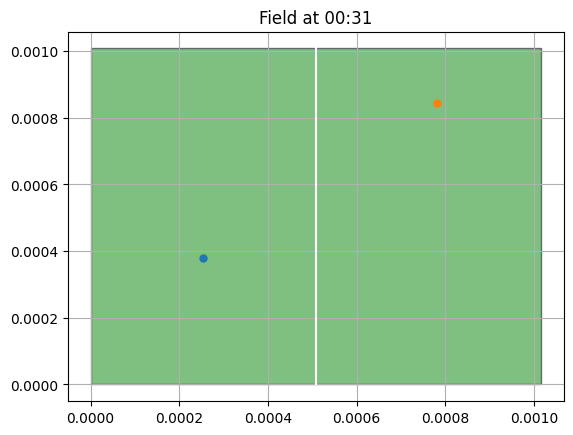

00:32


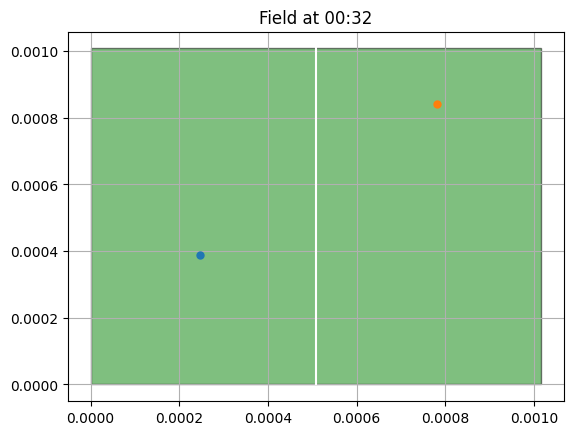

00:33


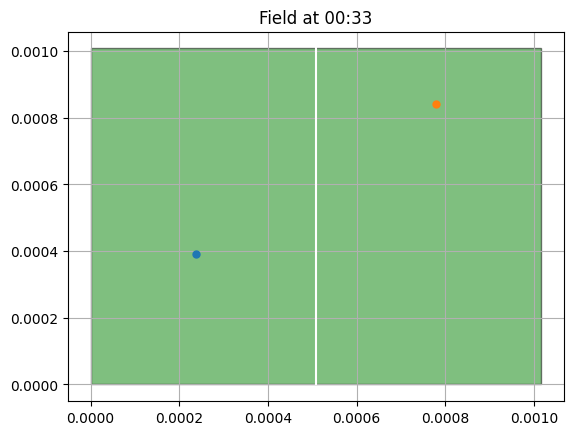

00:34


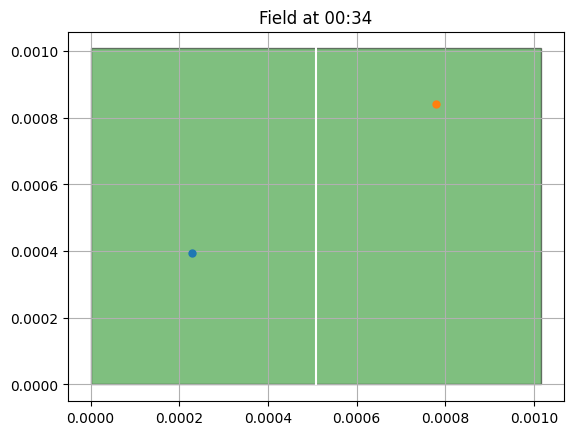

00:35


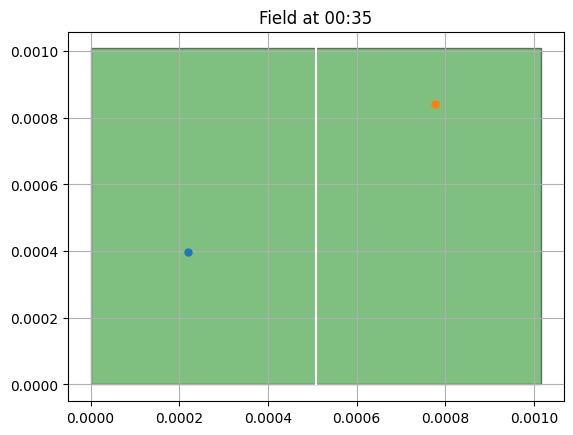

00:36


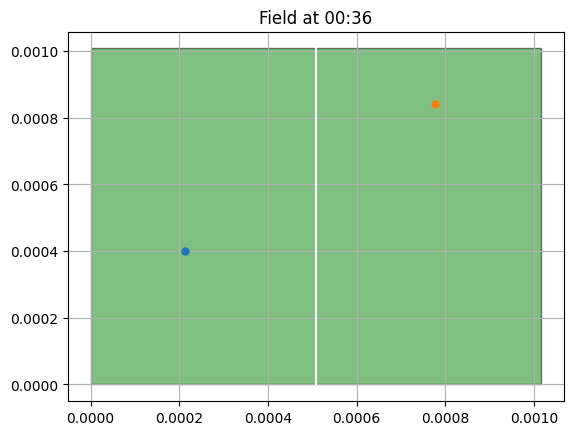

00:37


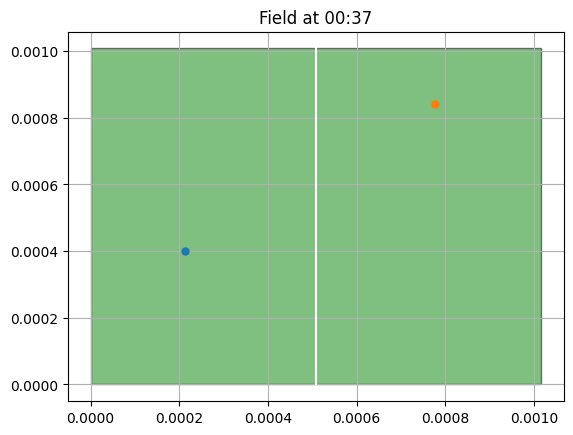

00:38


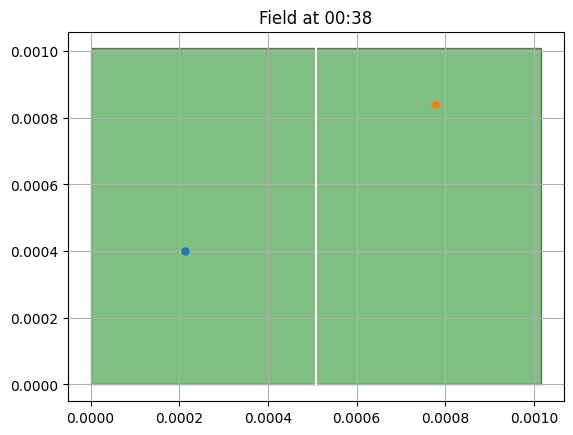

00:39


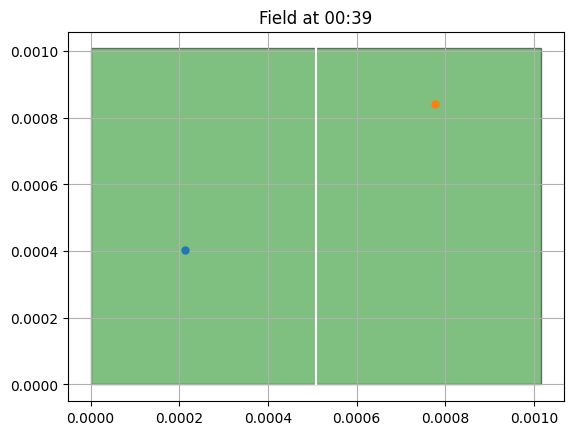

00:40


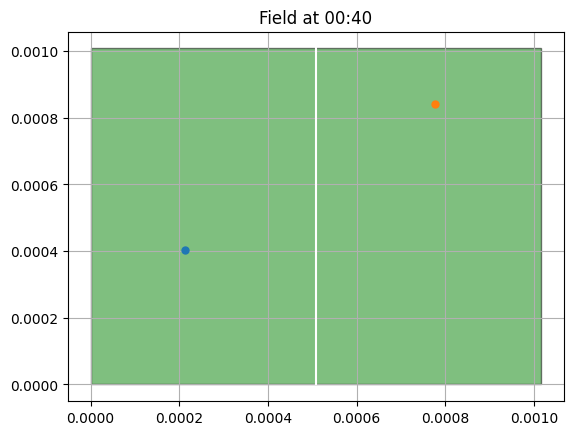

00:41


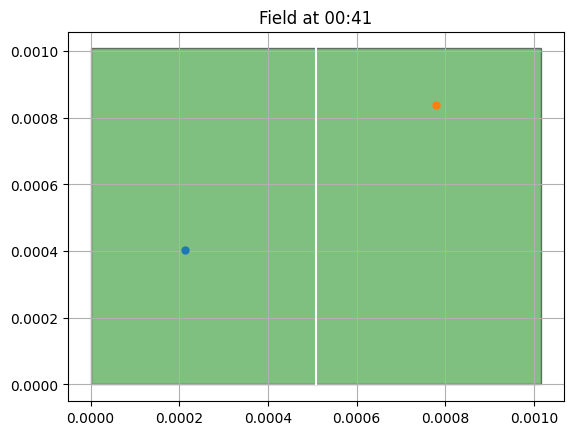

00:42


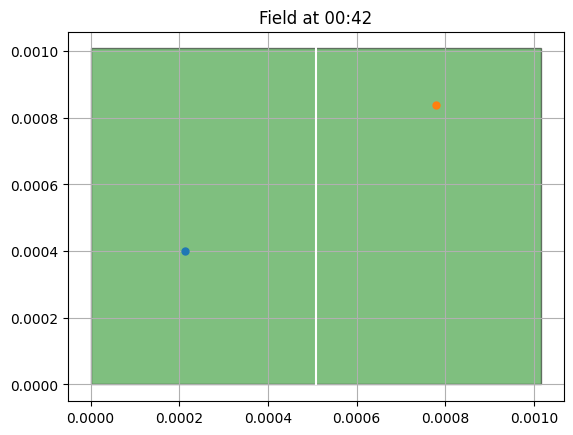

00:43


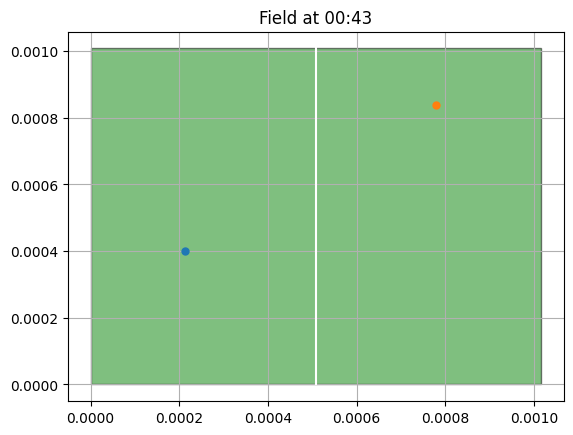

00:44


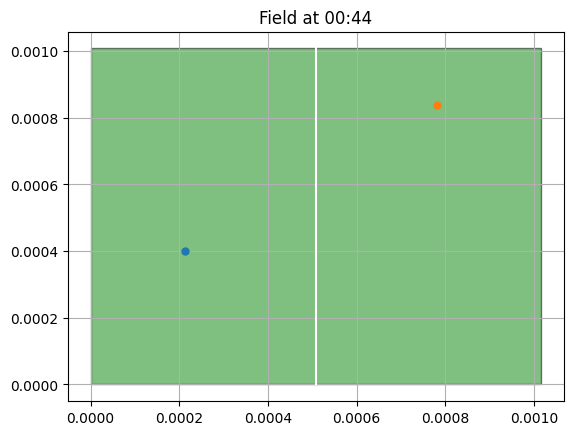

00:45


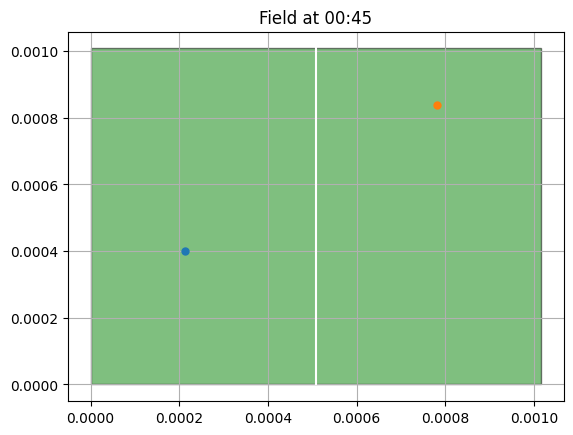

00:46


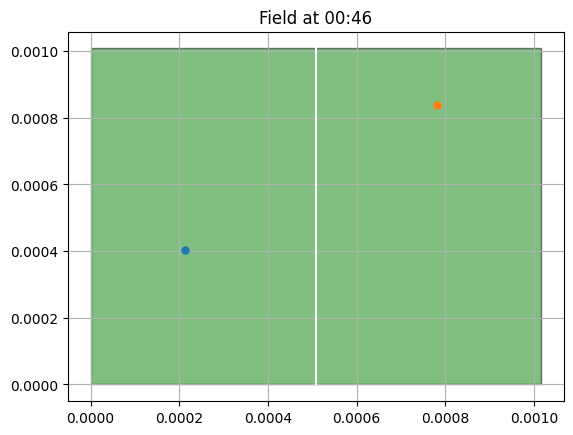

00:47


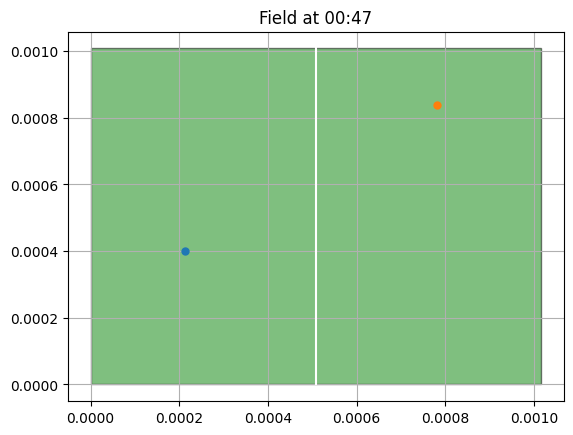

00:48


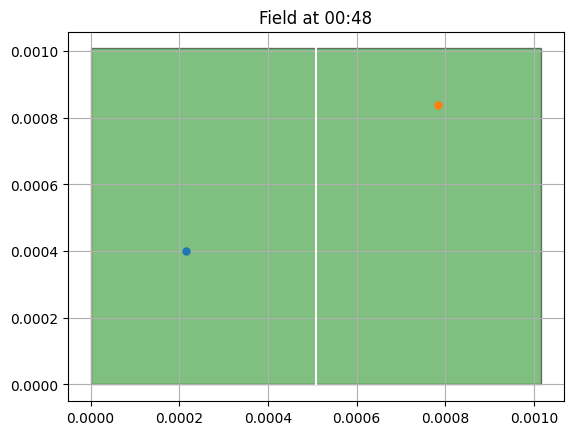

00:49


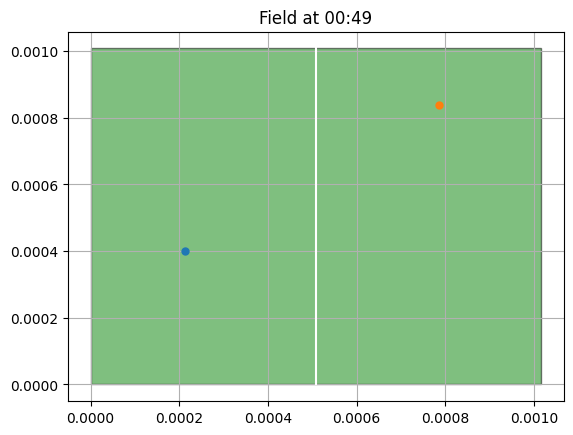

00:50


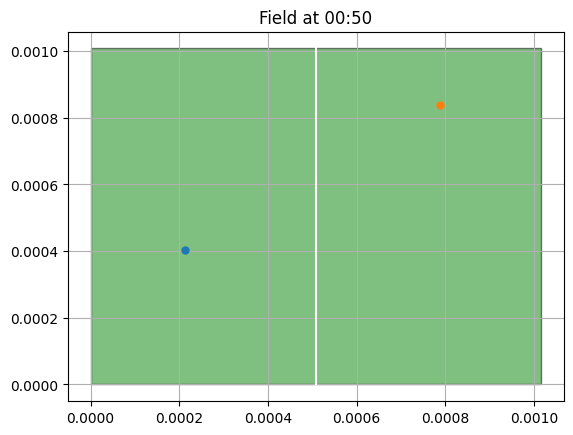

00:51


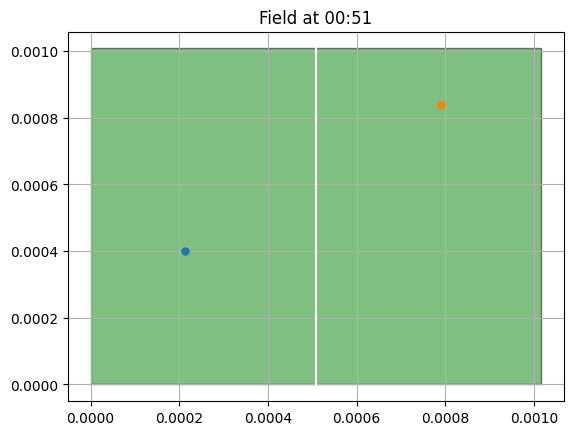

00:52


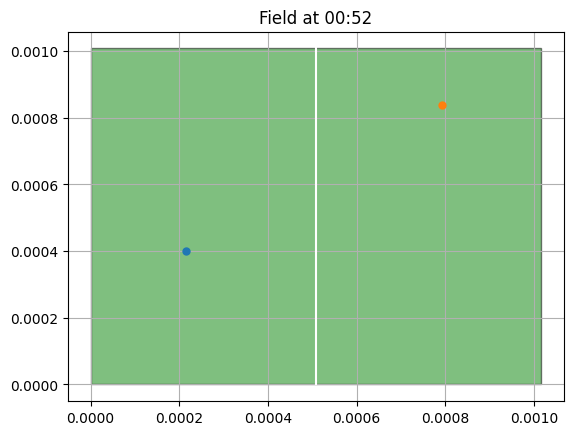

00:53


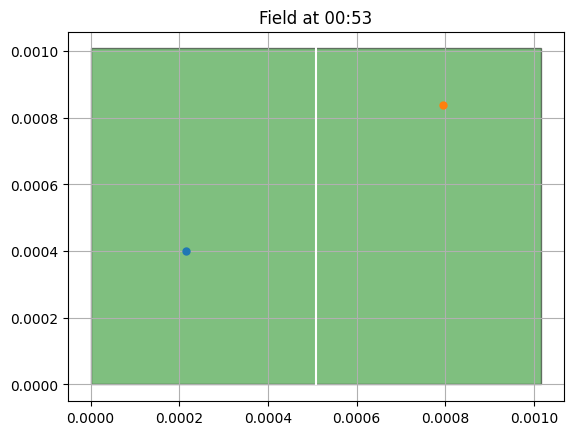

00:54


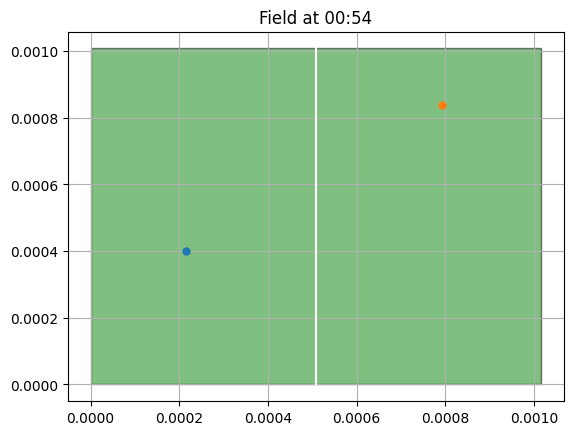

00:55


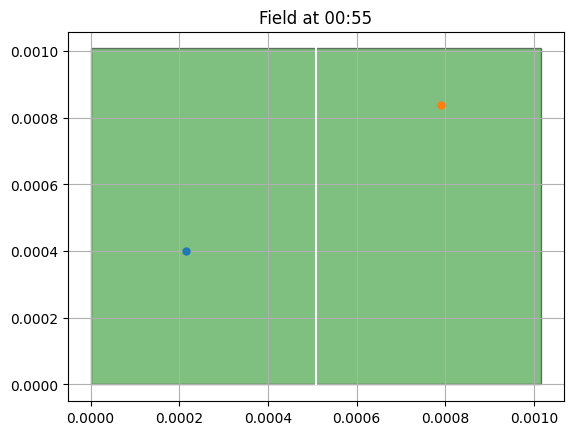

00:56


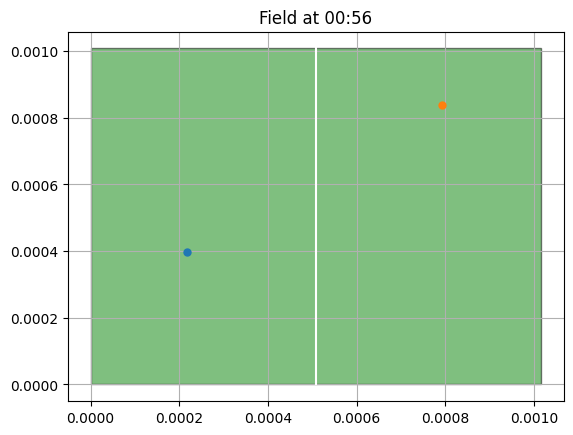

00:57


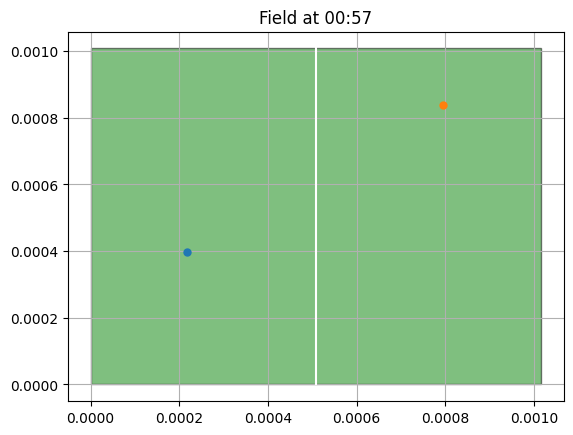

00:58


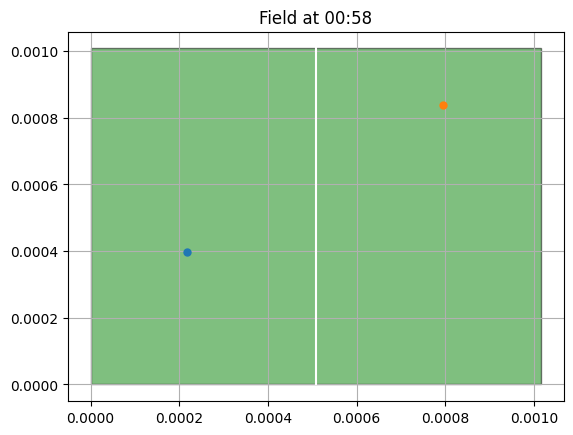

00:59


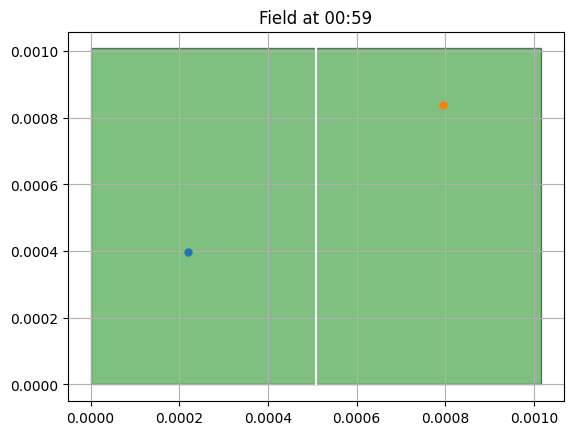

01:00


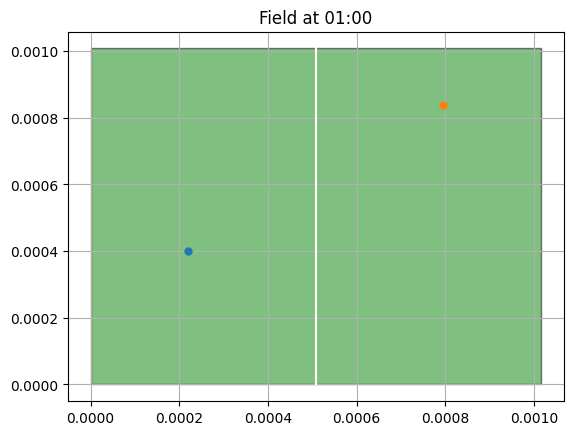

01:01


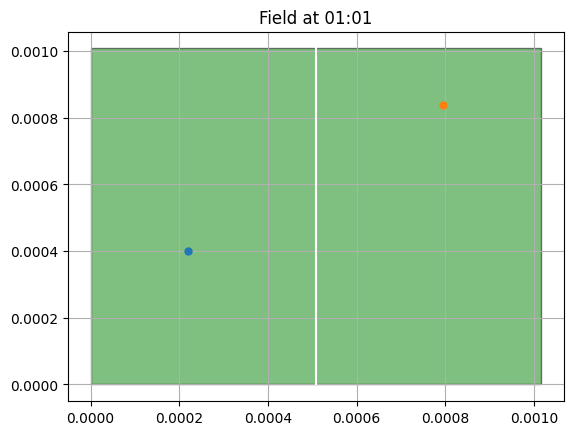

01:02


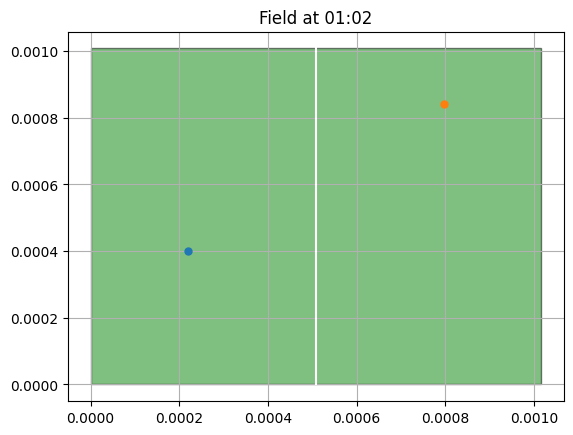

01:03


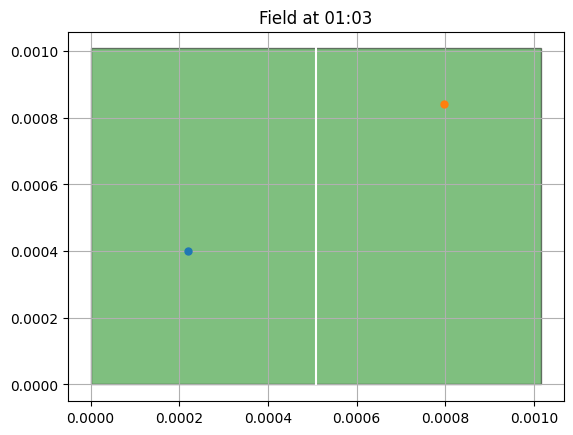

01:04


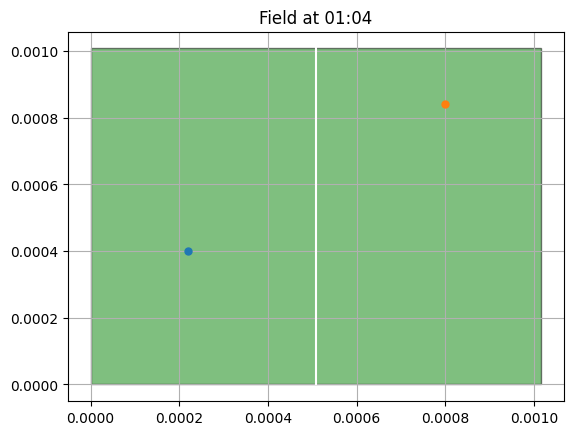

01:05


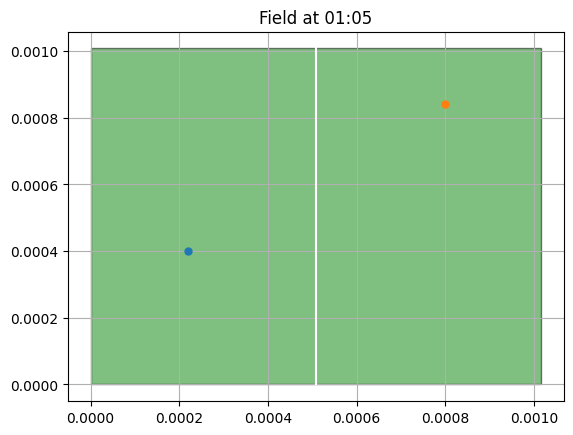

01:06


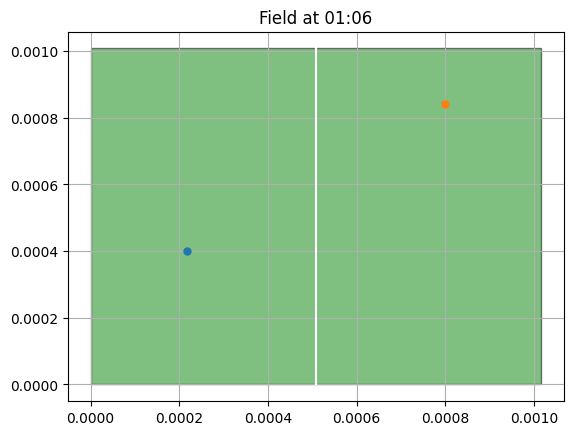

01:07


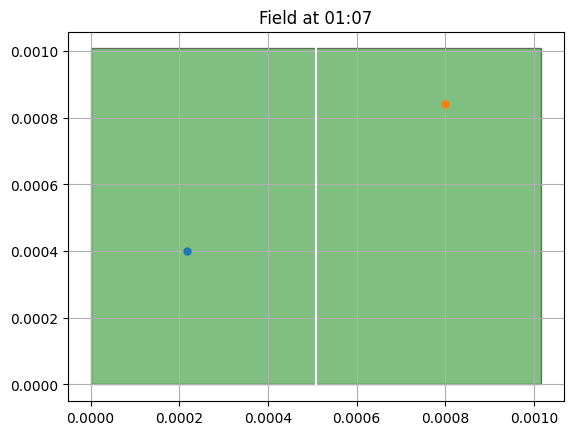

01:08


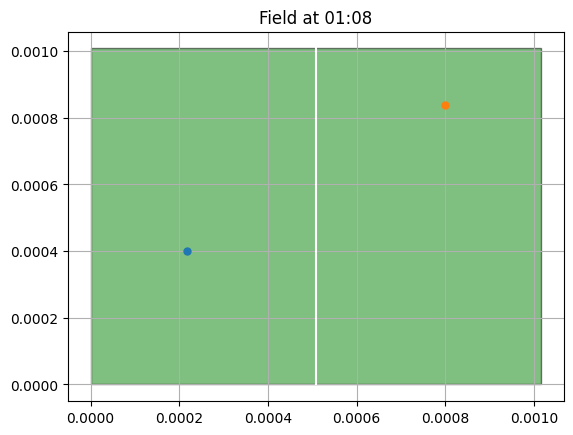

01:09


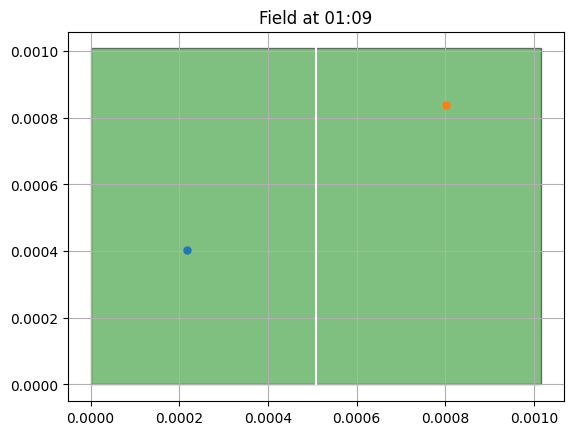

01:10


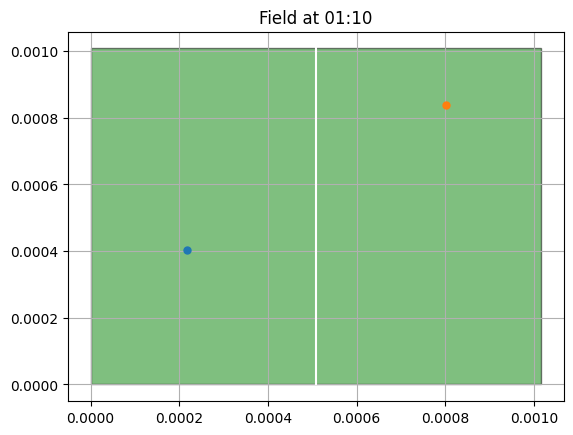

01:11


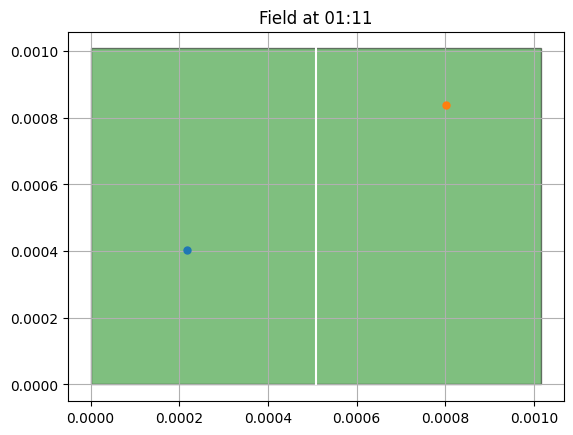

01:12


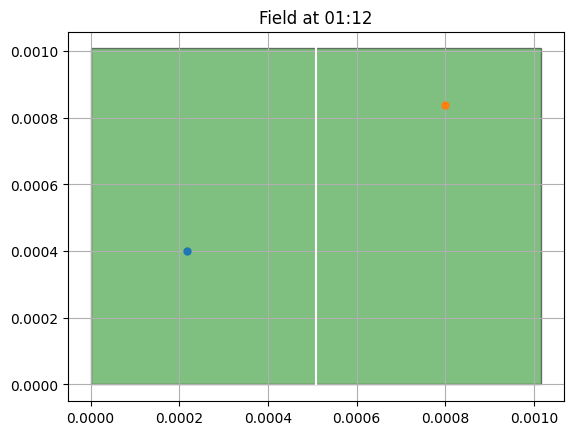

01:13


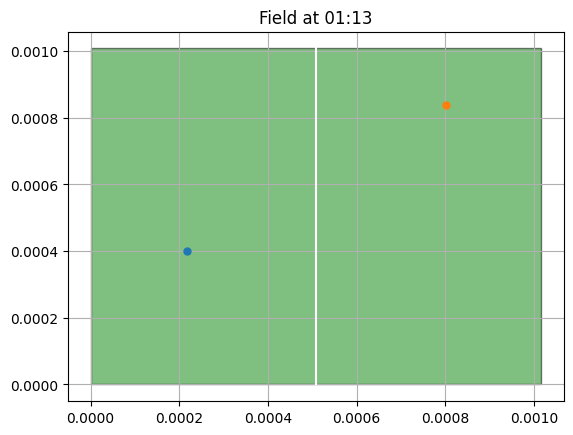

01:14


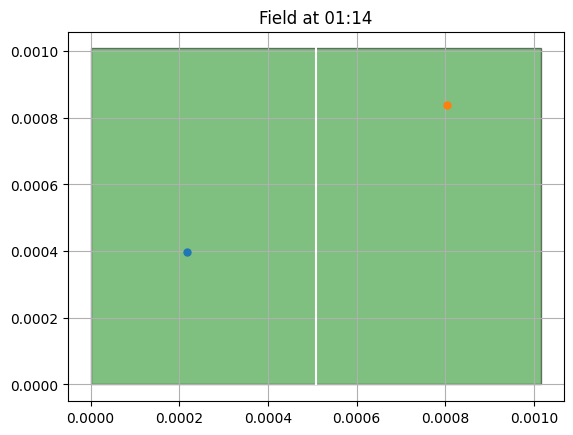

01:15


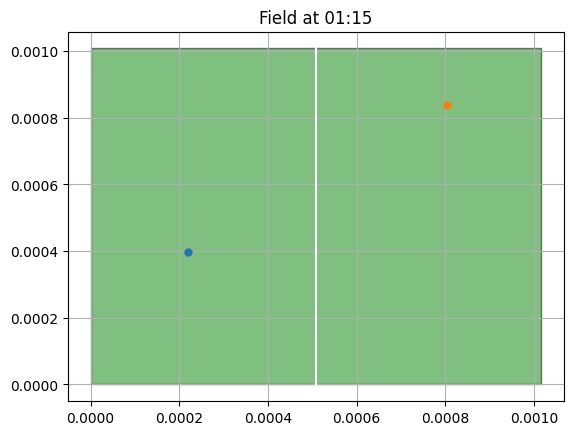

01:16


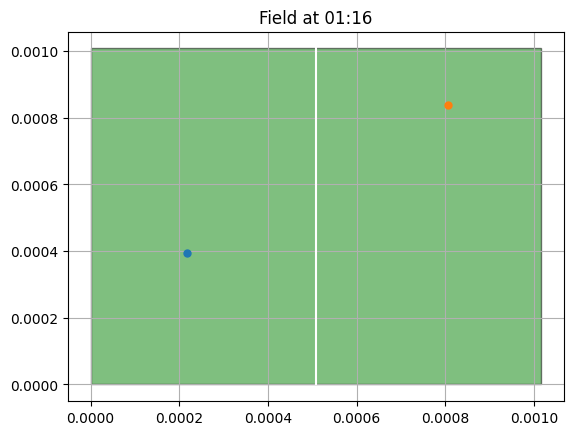

01:17


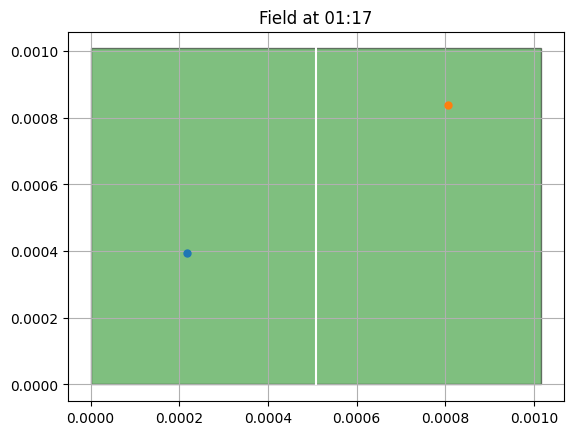

01:18


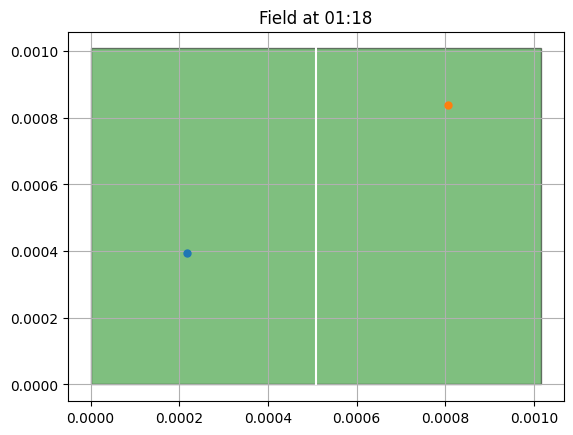

01:19


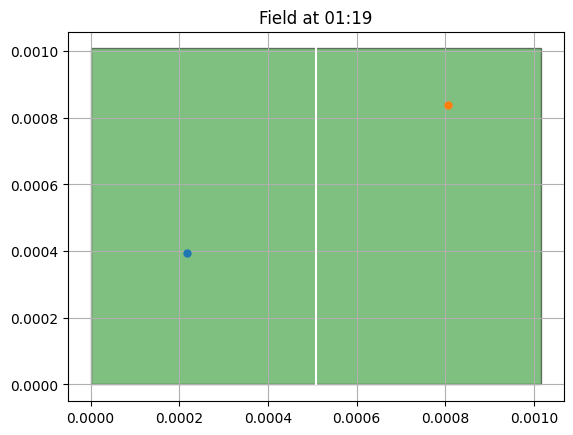

01:20


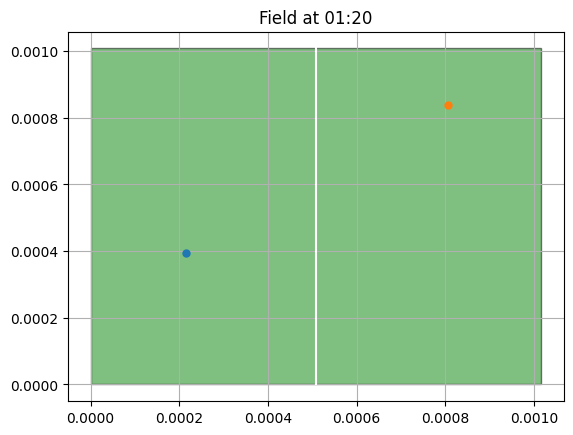

01:21


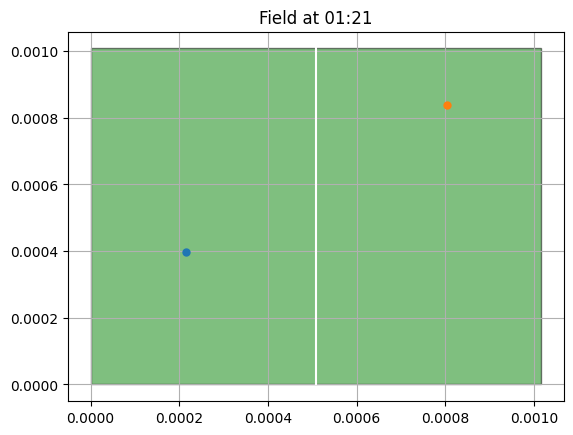

01:22


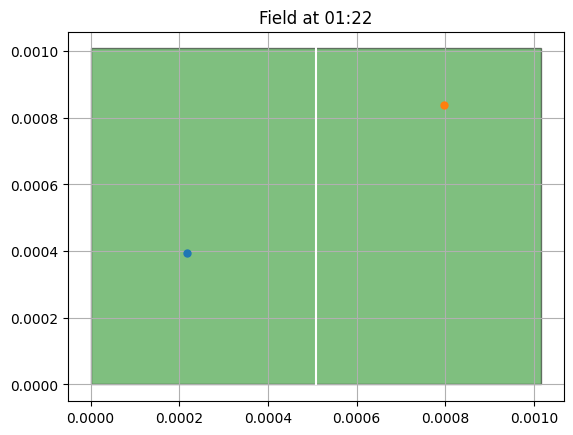

01:23


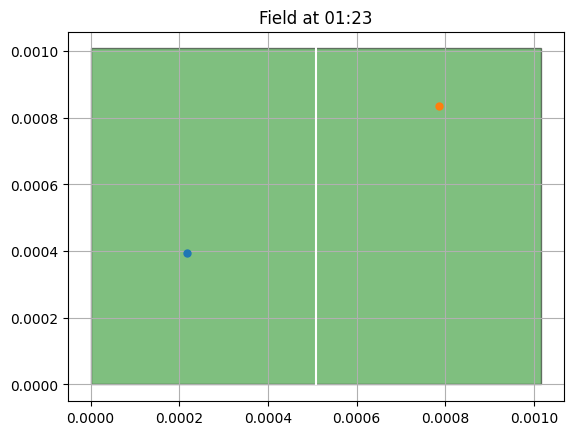

01:24


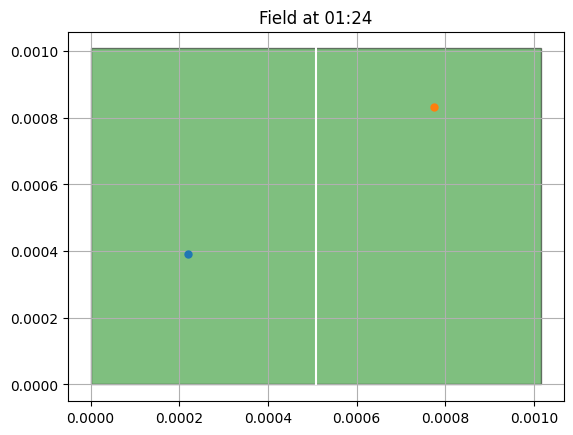

01:25


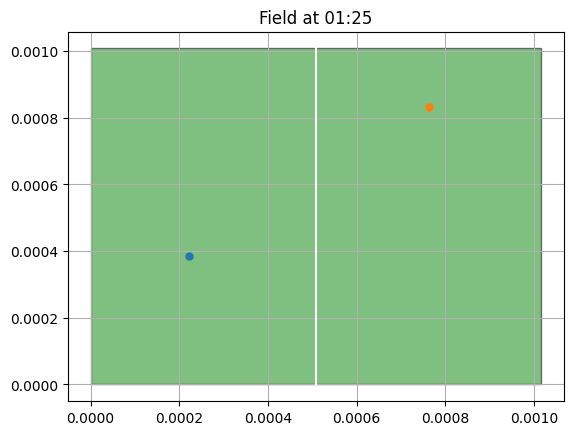

01:26


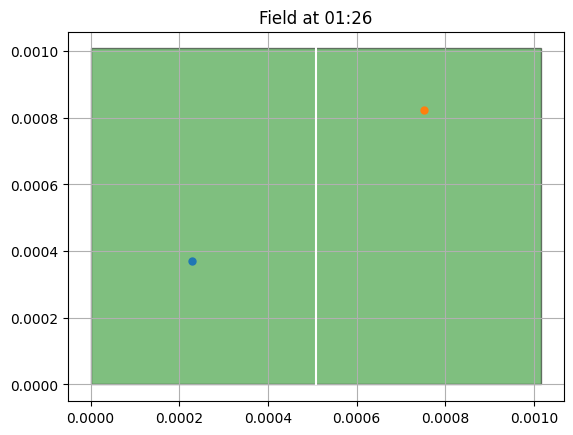

01:27


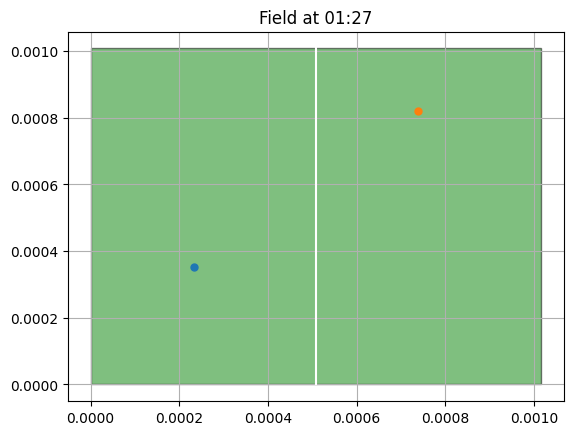

01:28


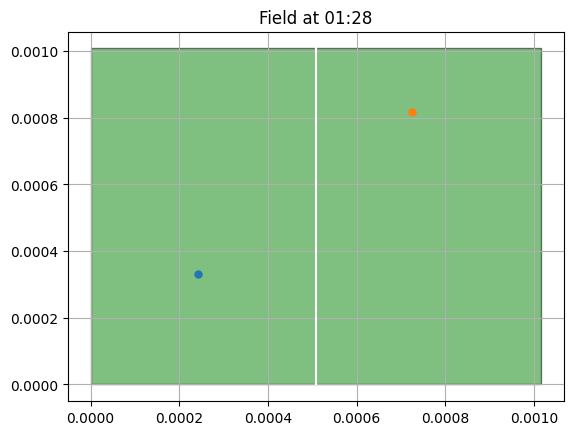

01:29


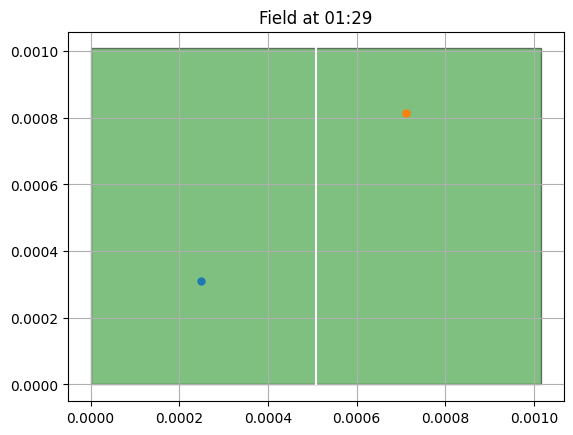

01:30


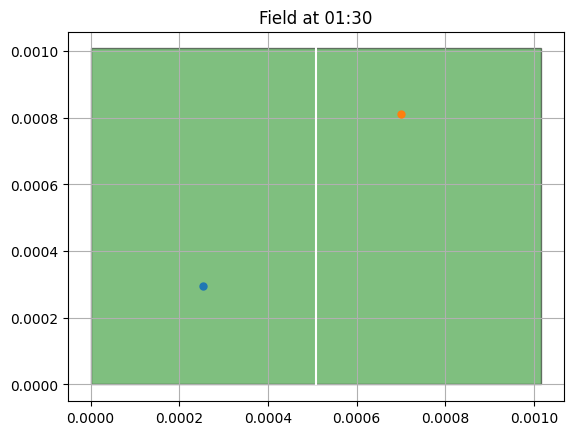

01:31


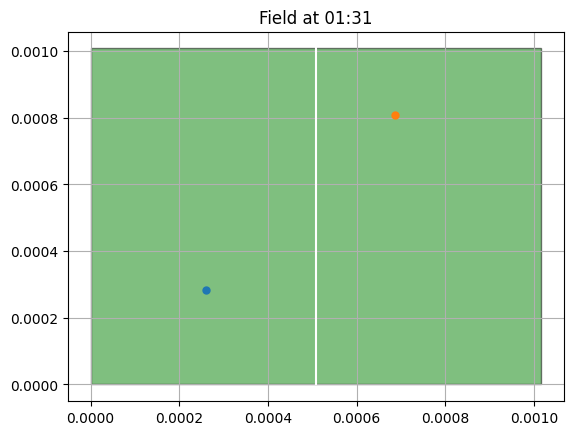

01:32


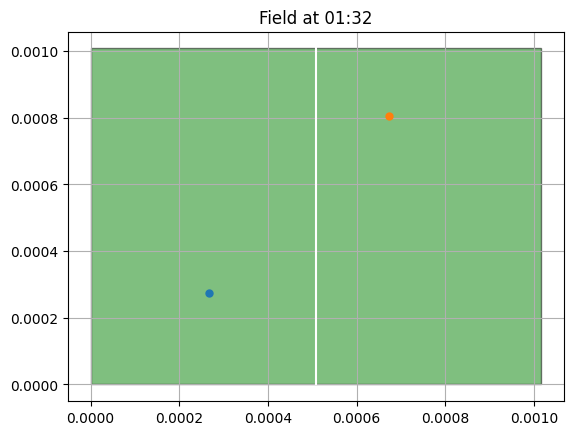

01:33


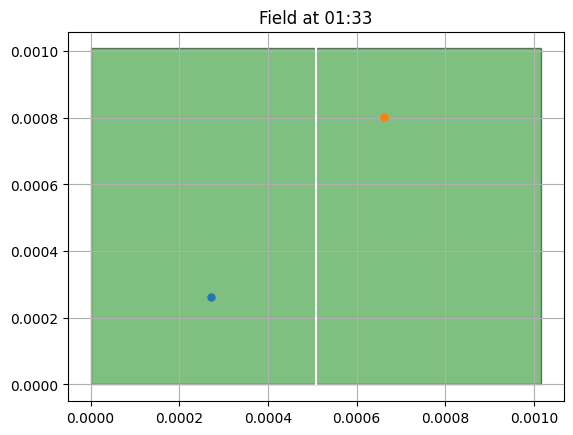

01:34


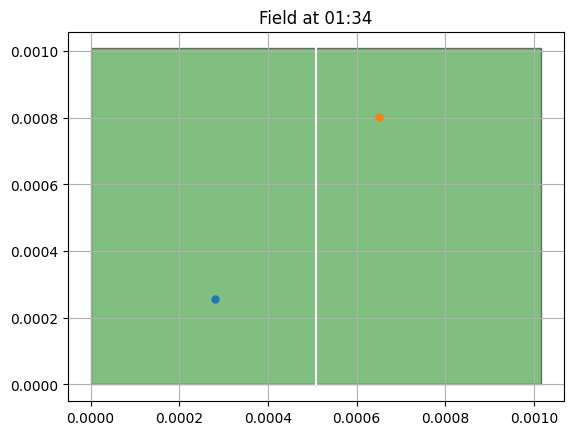

01:35


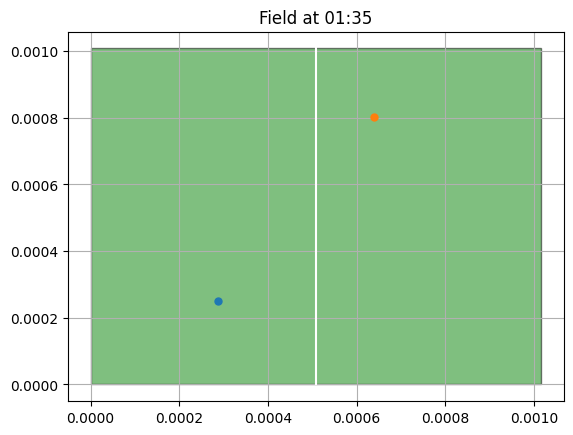

01:36


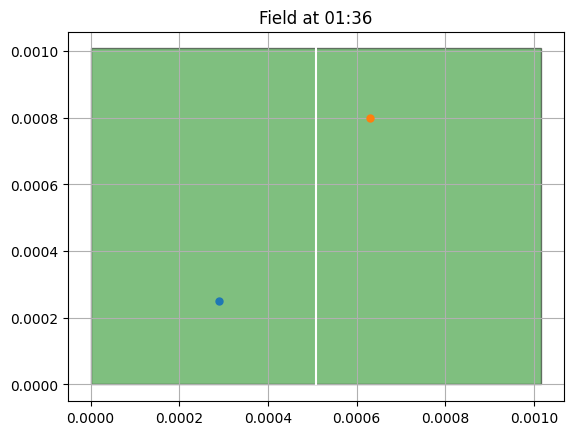

01:37


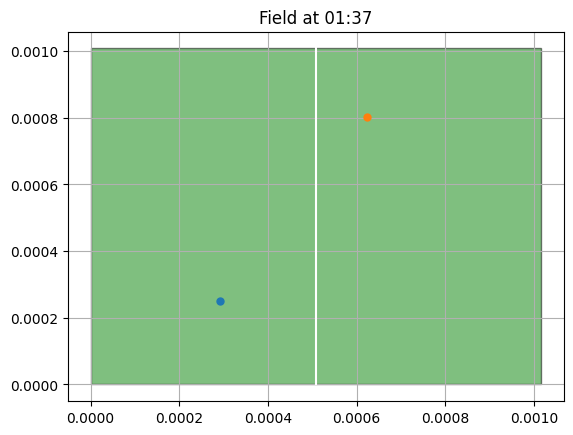

01:38


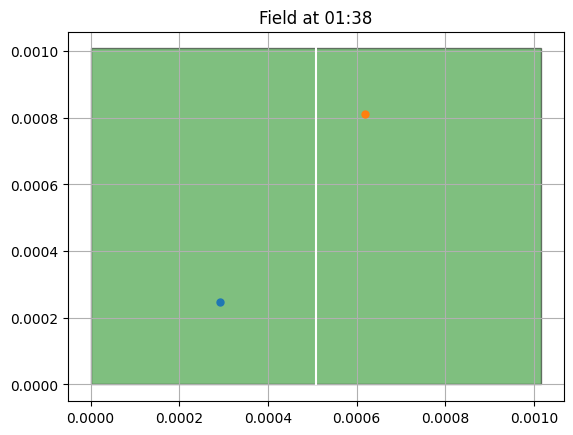

01:39


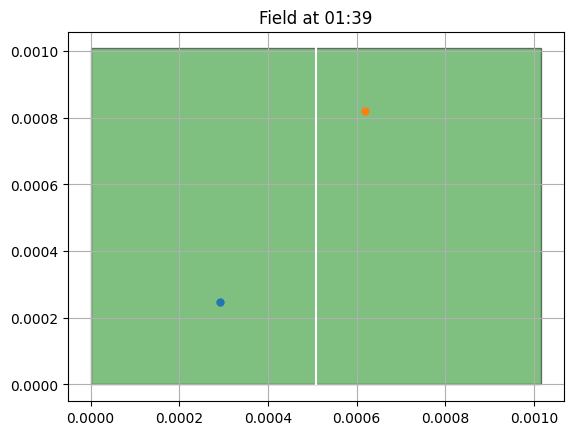

In [ ]:
slu_field.animate_field(path='test4.mp4')